In [1]:
from pre_processing import *
from syllable_dictionary import *
from split_poem import *
from build_rhyme_dict import *
import os
import numpy as np
import random
import heapq
import collections
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

[nltk_data] Downloading package punkt to /Users/ywwu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /Users/ywwu/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [8]:
# get syllable dictionary

# syllable_filename = "./project3/data/Syllable_dictionary.txt"
# syllable_dict, syllable_end_dict = get_syllable_dict(syllable_filename)

In [3]:
# get rhyme dictionary

# rhyme_filename = "./project3/data/shakespeare.txt"
# rhyme_dict = get_rhyme_dict(rhyme_filename)

In [4]:
# pre_processing_sentences_reverse

# sha_filename = "./project3/data/shakespeare.txt"
# obs_s, obs_map_s = pre_processing_sentences_reverse(sha_filename)
# # get reversed obs_map_s
# obs_map_s_rev = {}
# for key, value in obs_map_s.items():
#     obs_map_s_rev[value] = key

In [2]:
def get_dicts_preprocess(syllable_filename, rhyme_filename, sha_filename):
    syllable_dict, syllable_end_dict = get_syllable_dict(syllable_filename)
    rhyme_dict = get_rhyme_dict(rhyme_filename)
    obs_s, obs_map_s = pre_processing_sentences_reverse(sha_filename)
    obs_map_s_rev = {}
    for key, value in obs_map_s.items():
        obs_map_s_rev[value] = key
    return syllable_dict, syllable_end_dict, rhyme_dict, obs_s, obs_map_s, obs_map_s_rev

In [3]:
def get_high_prob_obs(hmm, num_obs_displayed, obs_map_s_rev):
    A_mat = hmm.A
    O_mat = hmm.O
    state_obs_topN = collections.defaultdict(list)
    for i in range(len(O_mat)): # states, O_mat[i] are the probabilities of each obs under this state
        obs_prob = []
        for j in range(len(O_mat[i])): # observations
            heapq.heappush(obs_prob, (O_mat[i][j], obs_map_s_rev[j])) # (prob, obs-word)
        top_n = heapq.nlargest(num_obs_displayed, obs_prob)
        for prob, obs in top_n:
            state_obs_topN[i].append(obs)
#             print("************************** Start *******************************")
#             print("Current state = ", i)
#             print("Max_State_Prob_Trans: observation: ", obs, ", probability = ", prob)
#             print("************************** End *******************************")
    return state_obs_topN

  

In [4]:
def rhyme_HMM_main(num_hidden_states, iterations, num_obs_displayed, syllable_filename, rhyme_filename, sha_filename):
    syllable_dict, syllable_end_dict, rhyme_dict, obs_s, obs_map_s, obs_map_s_rev = get_dicts_preprocess(syllable_filename, rhyme_filename, sha_filename)
    
    hmms = []
    poems_output = []
    state_obs_topN_list = []

    for num_hs in num_hidden_states:
        print("***************************** Hidden States Start! *****************************")
        print("Current number of hidden states = ", num_hs)

        for iteration in iterations:
            print("----------------------- Iteration Start! -----------------------")
            print("Current iteration times = ", iteration)
            state_obs_topN = {}
            hmm8_s = unsupervised_HMM(obs_s, num_hs, iteration)
            print("_________________ HERE ___ Train done ___ HERE _________________")
            hmms.append(hmm8_s)

            curr_poem_output = generate_rhyme_new(hmm8_s, rhyme_dict, syllable_dict, syllable_end_dict, obs_map_s)
            poems_output.append(curr_poem_output)
            print("+++++++++ Current Poem Start! ++++++++")
            print(curr_poem_output)
            print("+++++++++ Current Poem End! ++++++++++")

            visualize_sparsities(hmm8_s, O_max_cols=50)

            state_obs_topN = get_high_prob_obs(hmm8_s, num_obs_displayed, obs_map_s_rev)
            state_obs_topN_list.append(state_obs_topN)
            for key, value in state_obs_topN.items():
                print("///State = ", key, ", top N prob obs: ", value, "///")

            print("----------------------- Iteration End! ------------------------")

        print("***************************** Hidden States End! *****************************")
    return hmms, poems_output, state_obs_topN_list

In [5]:
def rhyme_HMM_main_old(num_hidden_states, iterations, num_obs_displayed, syllable_filename, rhyme_filename, sha_filename):
    syllable_dict, syllable_end_dict, rhyme_dict, obs_s, obs_map_s, obs_map_s_rev = get_dicts_preprocess(syllable_filename, rhyme_filename, sha_filename)
    
    hmms = []
    poems_output = []
    state_obs_topN_list = []

    for num_hs in num_hidden_states:
        print("***************************** Hidden States Start! *****************************")
        print("Current number of hidden states = ", num_hs)

        for iteration in iterations:
            print("----------------------- Iteration Start! -----------------------")
            print("Current iteration times = ", iteration)
            state_obs_topN = {}
            hmm8_s = unsupervised_HMM(obs_s, num_hs, iteration)
            print("_________________ HERE ___ Train done ___ HERE _________________")
            hmms.append(hmm8_s)

            curr_poem_output = generate_rhyme(hmm8_s, rhyme_dict, syllable_dict, syllable_end_dict, obs_map_s)
            poems_output.append(curr_poem_output)
            print("+++++++++ Current Poem Start! ++++++++")
            print(curr_poem_output)
            print("+++++++++ Current Poem End! ++++++++++")

            visualize_sparsities(hmm8_s, O_max_cols=50)

            state_obs_topN = get_high_prob_obs(hmm8_s, num_obs_displayed, obs_map_s_rev)
            state_obs_topN_list.append(state_obs_topN)
            for key, value in state_obs_topN.items():
                print("///State = ", key, ", top N prob obs: ", value, "///")

            print("----------------------- Iteration End! ------------------------")

        print("***************************** Hidden States End! *****************************")
    return hmms, poems_output, state_obs_topN_list

count of puncs =  0
***************************** Hidden States Start! *****************************
Current number of hidden states =  5
----------------------- Iteration Start! -----------------------
Current iteration times =  50
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
_________________ HERE ___ Train done ___ HERE _________________
+++++++++ Current Poem Start! ++++++++
of eyes thou pity your love victor live
i desperate thy his to the mortal be
take have pierced have kind man large nothing give
benefit open pity-wanting me
in substance big nor since i mortal hate
day mercy taker best well me of do
this may for in my blame they watch thy state
those hold you images i no to too
thou worthy that abysm alack content
in was where niggard slain wherefore and bold
not and as are is that joy struck day spent
yet flattered no frequent with the behold
others alone so shall fool all in still
old death that who's what tongue is world soon will.
+++++++++ Current 

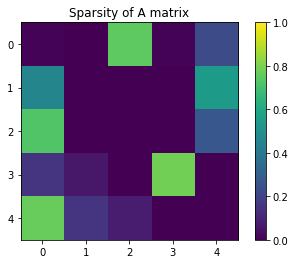

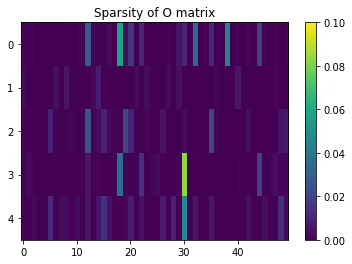

///State =  0 , top N prob obs:  ['the', 'i', 'my', 'thy', 'and', 'thou', 'that', 'a', 'is', 'me', 'thee', 'your', 'but', 'you', 'not'] ///
///State =  1 , top N prob obs:  ['day', 'heart', 'ill', 'age', 'come', 'away', 'night', 'part', 'woe', 'state', 'praise', 'time', 'new', 'lie', 'dead'] ///
///State =  2 , top N prob obs:  ['in', 'for', 'that', 'love', 'as', 'with', 'when', 'all', 'not', 'is', 'on', 'if', 'be', 'no', 'by'] ///
///State =  3 , top N prob obs:  ['to', 'of', 'the', 'and', 'me', 'a', 'thee', 'his', 'in', 'my', 'be', 'make', 'give', 'not', 'out'] ///
///State =  4 , top N prob obs:  ['of', 'and', 'to', 'my', 'do', 'by', 'self', 'from', 'will', 'be', 'which', 'so', 'it', 'shall', 'own'] ///
----------------------- Iteration End! ------------------------
----------------------- Iteration Start! -----------------------
Current iteration times =  100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 9

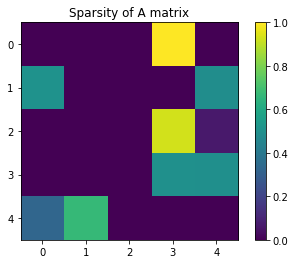

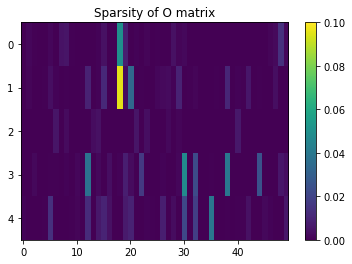

///State =  0 , top N prob obs:  ['and', 'the', 'love', 'in', 'which', 'heart', 'more', 'not', 'mine', 'self', 'be', 'will', 'make', 'on', 'as'] ///
///State =  1 , top N prob obs:  ['the', 'and', 'me', 'but', 'thee', 'so', 'not', 'it', 'o', 'by', 'you', 'thy', 'that', 'thine', 'him'] ///
///State =  2 , top N prob obs:  ['sight', 'part', 'away', 'decay', 'state', 'days', 'me', 'brow', 'lie', 'end', 'woe', 'alone', 'delight', 'prove', 'gone'] ///
///State =  3 , top N prob obs:  ['my', 'i', 'to', 'of', 'thy', 'that', 'a', 'thou', 'and', 'his', 'love', 'your', 'you', 'this', 'doth'] ///
///State =  4 , top N prob obs:  ['in', 'with', 'for', 'is', 'of', 'to', 'when', 'thou', 'and', 'from', 'be', 'that', 'all', 'so', 'if'] ///
----------------------- Iteration End! ------------------------
***************************** Hidden States End! *****************************
***************************** Hidden States Start! *****************************
Current number of hidden states =  8
-----

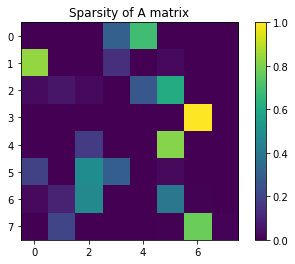

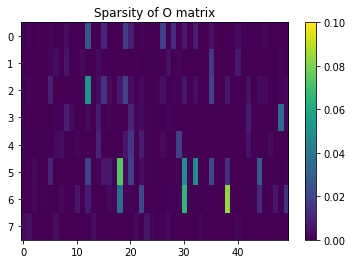

///State =  0 , top N prob obs:  ['is', 'i', 'not', 'that', 'on', 'eyes', 'still', 'as', 'thee', 'shall', 'eye', 'now', 'can', 'at', 'own'] ///
///State =  1 , top N prob obs:  ['be', 'doth', 'thee', 'have', 'me', 'see', 'not', 'live', 'with', 'can', 'upon', 'night', 'well', 'youth', "'t"] ///
///State =  2 , top N prob obs:  ['that', 'in', 'and', 'not', 'for', 'all', 'with', 'as', 'when', 'by', 'have', 'this', 'what', 'love', 'from'] ///
///State =  3 , top N prob obs:  ['love', 'self', 'in', 'than', 'heart', 'make', 'one', 'fair', 'if', 'thee', 'beauty', 'but', 'show', 'life', 'thought'] ///
///State =  4 , top N prob obs:  ['me', 'mine', 'and', 'do', 'thee', 'thine', 'but', 'you', 'which', 'love', 'it', 'beauty', 'then', 'when', 'art'] ///
///State =  5 , top N prob obs:  ['of', 'and', 'the', 'i', 'to', 'thou', 'a', 'my', 'with', 'that', 'but', 'is', 'in', 'me', 'thy'] ///
///State =  6 , top N prob obs:  ['my', 'thy', 'to', 'the', 'your', 'in', 'his', 'so', 'be', 'sweet', 'more', '

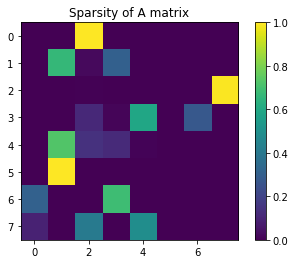

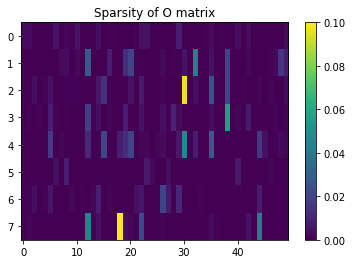

///State =  0 , top N prob obs:  ['of', 'be', 'hand', 'mistress', 'pride', 'days', 'pleasure', 'thine', 'part', 'sight', 'day', 'their', 'life', 'make', 'stand'] ///
///State =  1 , top N prob obs:  ['i', 'thou', 'not', 'and', 'so', 'that', 'but', 'thy', 'love', 'do', 'self', 'when', 'you', 'as', 'have'] ///
///State =  2 , top N prob obs:  ['to', 'and', 'of', 'my', 'with', 'which', 'thy', 'in', 'doth', 'by', 'your', 'is', 'all', 'world', 'for'] ///
///State =  3 , top N prob obs:  ['my', 'and', 'thy', 'me', 'thee', 'is', 'be', 'this', 'their', 'more', 'that', 'mine', 'which', 'or', 'her'] ///
///State =  4 , top N prob obs:  ['in', 'to', 'with', 'of', 'all', 'love', 'by', 'but', 'for', 'from', 'a', 'and', 'on', 'make', 'as'] ///
///State =  5 , top N prob obs:  ['show', 'away', 'spent', 'see', 'prove', 'seen', 'stay', 'know', 'alone', 'old', 'rhyme', 'gone', 'free', 'lie', 'might'] ///
///State =  6 , top N prob obs:  ['heart', 'eyes', 'all', 'eye', 'thine', 'for', 'it', 'fair', 'pen'

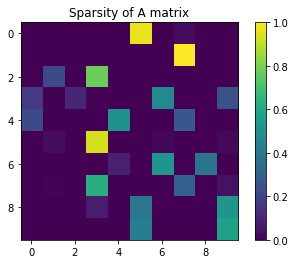

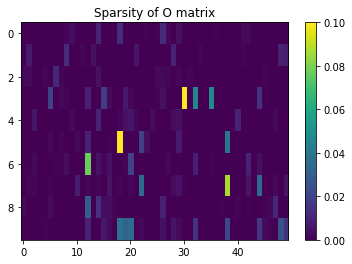

///State =  0 , top N prob obs:  ['love', 'thee', 'heart', 'the', 'verse', 'eyes', 'me', 'time', 'world', 'her', 'good', 'some', 'blood', 'now', 'sun'] ///
///State =  1 , top N prob obs:  ['sight', 'days', 'state', 'might', 'name', 'show', 'away', 'brow', 'self', 'own', 'part', 'heart', 'mind', 'rhyme', 'face'] ///
///State =  2 , top N prob obs:  ['thee', 'me', 'one', 'die', 'lie', 'decay', 'tell', 'write', 'thought', 'youth', 'you', 'stand', 'dwell', 'loss', 'new'] ///
///State =  3 , top N prob obs:  ['to', 'in', 'i', 'with', 'of', 'thou', 'and', 'for', 'from', 'doth', 'by', 'on', 'a', 'is', 'all'] ///
///State =  4 , top N prob obs:  ['is', 'so', 'are', 'eye', 'or', 'true', 'it', 'lies', 'time', 'pride', 'great', 'mine', 'being', 'dead', 'most'] ///
///State =  5 , top N prob obs:  ['the', 'my', 'me', 'thy', 'of', 'be', 'have', 'his', 'this', 'her', 'art', 'all', 'your', 'thee', 'am'] ///
///State =  6 , top N prob obs:  ['and', 'that', 'i', 'which', 'when', 'you', 'but', 'for', '

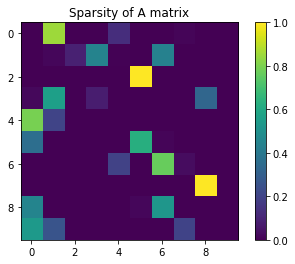

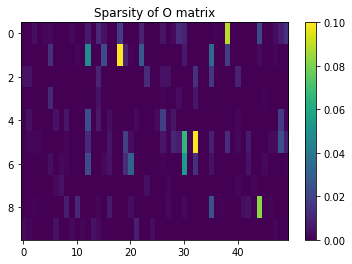

///State =  0 , top N prob obs:  ['thy', 'my', 'which', 'a', 'love', 'your', 'thee', 'the', 'this', 'more', 'sweet', 'mine', 'thine', 'time', 'their'] ///
///State =  1 , top N prob obs:  ['the', 'of', 'my', 'in', 'that', 'and', 'with', 'his', 'by', 'thy', 'all', 'on', 'your', 'for', 'no'] ///
///State =  2 , top N prob obs:  ['art', 'live', 'with', 'thee', 'use', 'eye', 'thou', 'away', 'bear', 'tell', 'lie', 'stay', 'stand', 'time', 'within'] ///
///State =  3 , top N prob obs:  ['in', 'and', 'thee', 'me', 'all', 'day', 'from', 'one', 'than', 'against', 'still', 'which', 'beauty', 'made', 'more'] ///
///State =  4 , top N prob obs:  ['and', 'love', 'that', 'is', 'heart', 'which', 'eyes', 'self', 'or', 'even', 'than', 'will', 'are', 'hath', 'eye'] ///
///State =  5 , top N prob obs:  ['thou', 'to', 'doth', 'me', 'it', 'self', 'so', 'as', 'dost', 'not', 'art', 'mine', 'shall', 'love', 'thy'] ///
///State =  6 , top N prob obs:  ['i', 'to', 'but', 'and', 'not', 'for', 'is', 'that', 'when

In [8]:
# version 1.5
# tune hyper-params
# "Keyboard Interupt" as current params are enough
syllable_filename = "./project3/data/Syllable_dictionary.txt"
rhyme_filename = "./project3/data/shakespeare.txt"
sha_filename = "./project3/data/shakespeare.txt"

num_hidden_states = [5, 8, 10]
iterations = [50, 100]
num_obs_displayed = 15

hmms, poems_output, state_obs_topN_list = rhyme_HMM_main_old(num_hidden_states, iterations, num_obs_displayed, syllable_filename, rhyme_filename, sha_filename)



In [9]:
count = 1
for hmm in hmms:
    print("Model " + str(count))
    print(hmm.A)
    count += 1
    print("___________________")
        

Model 1
[[0.008367486164958027, 1.0002952713583812e-15, 0.7527425707945852, 0.01069885379510203, 0.22819108924535242], [0.4534286842684179, 1.1304280714647274e-21, 2.2209175421113986e-07, 0.002079309141947707, 0.544491784497885], [0.7277457103785497, 3.792486576989869e-12, 9.59624109593135e-10, 1.996588068380758e-06, 0.2722522920699657], [0.1496997521212908, 0.06290377355478238, 6.568294663202481e-05, 0.7872012697343439, 0.00012952164295430198], [0.7691164141190355, 0.14886544124914677, 0.08197637907120131, 1.326925474688583e-05, 2.8496305872336085e-05]]
___________________
Model 2
[[9.530488344293036e-05, 8.677487250467806e-17, 1.990026449600222e-38, 0.9999046951165544, 4.5260341214970155e-18], [0.5103432541852574, 3.3108944318214096e-07, 7.425197779359914e-60, 7.659362679508167e-10, 0.48965641395936377], [4.877525782964564e-25, 5.251635883443576e-20, 5.082319293767233e-69, 0.93095568125667, 0.06904431874333035], [6.466682063348722e-05, 9.703504835862317e-12, 5.842068295786469e-31, 0.

In [10]:
import heapq
count = 1
state_state_trans_list = []
for hmm in hmms:
    print("Model " + str(count))
    state_state_trans = collections.defaultdict(list)
    for i in range(len(hmm.A)):
        temp = []
        for j in range(len(hmm.A[i])):
            heapq.heappush(temp, (hmm.A[i][j], j))
        top_N = heapq.nlargest(5, temp)
        state_state_trans[i] = top_N
    for key, value in state_state_trans.items():
        print("Current state = ", key, ", Transition: ", value)
    state_state_trans_list.append(state_state_trans)    
    count += 1
    print("___________________")

Model 1
Current state =  0 , Transition:  [(0.7527425707945852, 2), (0.22819108924535242, 4), (0.01069885379510203, 3), (0.008367486164958027, 0), (1.0002952713583812e-15, 1)]
Current state =  1 , Transition:  [(0.544491784497885, 4), (0.4534286842684179, 0), (0.002079309141947707, 3), (2.2209175421113986e-07, 2), (1.1304280714647274e-21, 1)]
Current state =  2 , Transition:  [(0.7277457103785497, 0), (0.2722522920699657, 4), (1.996588068380758e-06, 3), (9.59624109593135e-10, 2), (3.792486576989869e-12, 1)]
Current state =  3 , Transition:  [(0.7872012697343439, 3), (0.1496997521212908, 0), (0.06290377355478238, 1), (0.00012952164295430198, 4), (6.568294663202481e-05, 2)]
Current state =  4 , Transition:  [(0.7691164141190355, 0), (0.14886544124914677, 1), (0.08197637907120131, 2), (2.8496305872336085e-05, 4), (1.326925474688583e-05, 3)]
___________________
Model 2
Current state =  0 , Transition:  [(0.9999046951165544, 3), (9.530488344293036e-05, 0), (8.677487250467806e-17, 1), (4.526

count of puncs =  0
***************************** Hidden States Start! *****************************
Current number of hidden states =  5
----------------------- Iteration Start! -----------------------
Current iteration times =  150
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 110
Iteration: 120
Iteration: 130
Iteration: 140
Iteration: 150
_________________ HERE ___ Train done ___ HERE _________________
+++++++++ Current Poem Start! ++++++++
make virtue that in of hardest depart
in me draw well on words i sight new-fired
do save pride not alter and eye thy heart
therefore is dust stealth is in desired
looking that's in i see is pattern it
in is gentle brood to uttering o cheeks
for love's live it is her we give heart it
ten though with three losses a store of weeks
persuade sweets askance thy yea love his looks
issue and eyes hunted upon dear heaven
hath due thou woe the give suc

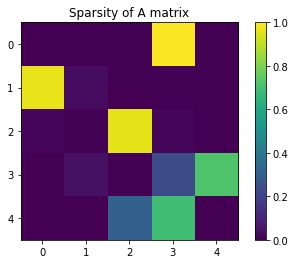

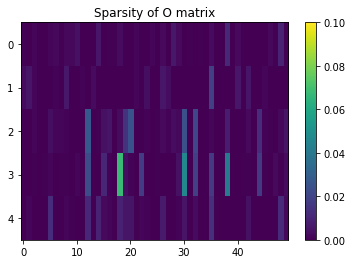

///State =  0 , top N prob obs:  ['be', 'thee', 'me', 'thy', 'self', 'more', 'your', 'heart', 'so', 'you', 'doth', 'true', 'own', 'their', 'art'] ///
///State =  1 , top N prob obs:  ['with', 'sight', 'away', 'days', 'are', 'out', 'alone', 'thus', 'dead', 'day', 'age', 'end', 'pride', 'show', 'pen'] ///
///State =  2 , top N prob obs:  ['i', 'and', 'that', 'but', 'to', 'thou', 'not', 'so', 'you', 'in', 'as', 'for', 'me', 'do', 'a'] ///
///State =  3 , top N prob obs:  ['my', 'the', 'of', 'and', 'to', 'thy', 'is', 'that', 'thou', 'his', 'a', 'with', 'it', 'doth', 'i'] ///
///State =  4 , top N prob obs:  ['in', 'love', 'all', 'for', 'with', 'from', 'self', 'that', 'be', 'time', 'the', 'when', 'beauty', 'which', 'eye'] ///
----------------------- Iteration End! ------------------------
***************************** Hidden States End! *****************************
***************************** Hidden States Start! *****************************
Current number of hidden states =  8
--------

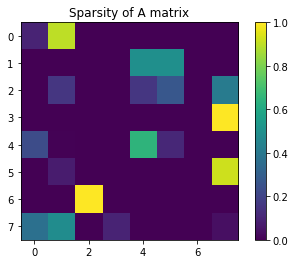

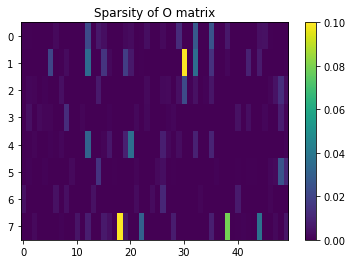

///State =  0 , top N prob obs:  ['in', 'thee', 'all', 'thou', 'with', 'that', 'you', 'be', 'on', 'me', 'for', 'make', 'mine', 'art', 'this'] ///
///State =  1 , top N prob obs:  ['to', 'and', 'of', 'in', 'thou', 'that', 'is', 'from', 'when', 'as', 'for', 'doth', 'by', 'with', 'shall'] ///
///State =  2 , top N prob obs:  ['be', 'doth', 'to', 'is', 'self', 'are', 'did', 'can', 'thee', 'do', 'true', 'not', 'one', 'hand', 'more'] ///
///State =  3 , top N prob obs:  ['day', 'night', 'might', 'sight', 'mind', 'days', 'will', 'brow', 'state', 'store', 'face', 'skill', 'part', 'show', 'self'] ///
///State =  4 , top N prob obs:  ['and', 'but', 'i', 'not', 'that', 'so', 'which', 'me', 'it', 'thee', 'for', 'or', 'are', 'then', 'if'] ///
///State =  5 , top N prob obs:  ['love', 'self', 'heart', 'beauty', 'time', 'am', 'sweet', 'world', 'fair', 'more', 'have', 'life', 'praise', 'one', 'worth'] ///
///State =  6 , top N prob obs:  ['lie', 'prove', 'eyes', 'new', 'sight', 'alone', 'decay', 'end'

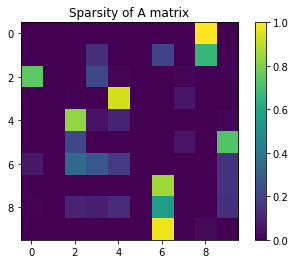

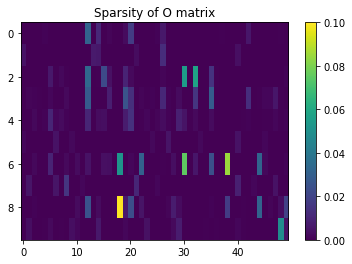

///State =  0 , top N prob obs:  ['and', 'which', 'that', 'or', 'if', 'but', 'love', 'when', 'than', 'o', 'time', 'how', 'world', 'though', 'then'] ///
///State =  1 , top N prob obs:  ['part', 'woe', 'pride', 'skill', 'days', 'delight', 'face', 'day', 'eyes', 'spend', 'view', 'wrong', 'pen', 'rhyme', 'prove'] ///
///State =  2 , top N prob obs:  ['of', 'i', 'thou', 'to', 'in', 'that', 'and', 'is', 'for', 'by', 'do', 'with', 'can', 'all', 'they'] ///
///State =  3 , top N prob obs:  ['not', 'with', 'that', 'as', 'thee', 'so', 'in', 'when', 'for', 'you', 'thou', 'on', 'now', 'what', 'but'] ///
///State =  4 , top N prob obs:  ['i', 'in', 'not', 'all', 'me', 'you', 'mine', 'thee', 'art', 'of', 'it', 'have', 'love', 'but', 'for'] ///
///State =  5 , top N prob obs:  ['away', 'night', 'alone', 'still', 'light', 'sight', 'spent', 'respect', 'behind', 'strange', 'seen', 'eye', 'prove', 'remain', 'fight'] ///
///State =  6 , top N prob obs:  ['my', 'thy', 'to', 'the', 'of', 'a', 'his', 'your'

In [11]:
# version 1.5.2
# tune hyper-params
# "Keyboard Interupt" as current params are enough
syllable_filename = "./project3/data/Syllable_dictionary.txt"
rhyme_filename = "./project3/data/shakespeare.txt"
sha_filename = "./project3/data/shakespeare.txt"

num_hidden_states = [5, 8, 10]
iterations = [150]
num_obs_displayed = 15

hmms, poems_output, state_obs_topN_list = rhyme_HMM_main_old(num_hidden_states, iterations, num_obs_displayed, syllable_filename, rhyme_filename, sha_filename)


In [12]:
import heapq
count = 1
state_state_trans_list = []
for hmm in hmms:
    print("Model " + str(count))
    state_state_trans = collections.defaultdict(list)
    for i in range(len(hmm.A)):
        temp = []
        for j in range(len(hmm.A[i])):
            heapq.heappush(temp, (hmm.A[i][j], j))
        top_N = heapq.nlargest(5, temp)
        state_state_trans[i] = top_N
    for key, value in state_state_trans.items():
        print("Current state = ", key, ", Transition: ", value)
    state_state_trans_list.append(state_state_trans)    
    count += 1
    print("___________________")

Model 1
Current state =  0 , Transition:  [(0.9926620382237936, 3), (0.007337961776205242, 2), (9.940978143127267e-28, 0), (4.9479803038685e-34, 4), (4.638493176096197e-74, 1)]
Current state =  1 , Transition:  [(0.9687281185837222, 0), (0.03127188141627734, 1), (4.2734149398364867e-29, 3), (1.7777346470889933e-40, 2), (7.029806031893578e-45, 4)]
Current state =  2 , Transition:  [(0.959622227877831, 2), (0.01768781190699147, 3), (0.016139517430794212, 0), (0.006550440716526314, 1), (2.0678538543675807e-09, 4)]
Current state =  3 , Transition:  [(0.7252620094859007, 4), (0.22929009225405514, 3), (0.04543983757454623, 1), (8.060685501718815e-06, 2), (1.9428566669382247e-38, 0)]
Current state =  4 , Transition:  [(0.6937858501180479, 3), (0.3062141498818463, 2), (1.104348395551564e-13, 4), (5.7395794077667265e-30, 0), (2.4306185282749025e-36, 1)]
___________________
Model 2
Current state =  0 , Transition:  [(0.9014230453740145, 1), (0.09857695462598161, 0), (3.78787048410014e-15, 4), (3

count of puncs =  0
***************************** Hidden States Start! *****************************
Current number of hidden states =  15
----------------------- Iteration Start! -----------------------
Current iteration times =  50
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
_________________ HERE ___ Train done ___ HERE _________________
+++++++++ Current Poem Start! ++++++++
limbs having i as love decease new-fired
as said parts you dare and i ever lend
toil made but then counting new desired
images want do the bier they have friend
a air it how thee it vex whate'er him
i whose that lifts his drawn time can worth clay
do ear without my will draw and to trim
to share heart silver than mad an decay
it can the even is of conscience to thine
a most so to thou gave eternal face
that thy upon and more praise even o mine
sway shall thee holds they every shadow's place
tables fester can not your self skill latch
vanished not i have their my sensual catch.
++++++++

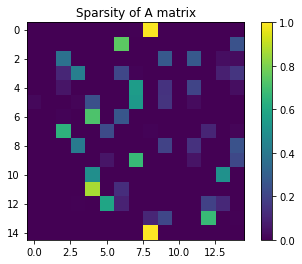

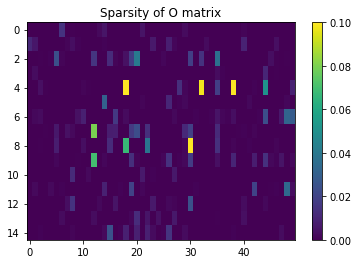

///State =  0 , top N prob obs:  ['lie', 'die', 'state', 'decay', 'brow', 'rest', 'view', 'end', 'sing', 'spent', 'night', 'pride', 'dwell', 'none', 'dead'] ///
///State =  1 , top N prob obs:  ['away', 'place', 'alone', 'hate', 'days', 'sight', 'face', 'increase', 'moan', 'end', 'lies', 'dead', 'new', 'light', 'decay'] ///
///State =  2 , top N prob obs:  ['is', 'but', 'with', 'and', 'from', 'for', 'o', 'they', 'so', 'it', 'then', 'you', 'to', 'me', 'as'] ///
///State =  3 , top N prob obs:  ['and', 'my', 'in', 'than', 'it', 'on', 'hath', 'of', 'or', 'a', 'is', 'heart', 'new', 'made', 'therefore'] ///
///State =  4 , top N prob obs:  ['the', 'thy', 'my', 'thou', 'a', 'your', 'so', 'with', 'be', 'which', 'her', 'own', 'every', 'and', 'more'] ///
///State =  5 , top N prob obs:  ['i', 'love', 'time', 'and', 'she', 'you', 'not', 'fair', 'eyes', 'still', 'glass', 'one', 'praise', 'he', 'kind'] ///
///State =  6 , top N prob obs:  ['self', 'sweet', 'my', 'a', 'true', 'should', 'art', 'it',

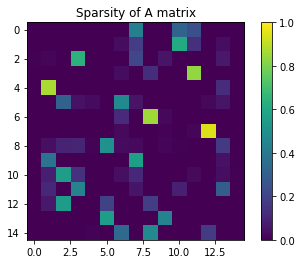

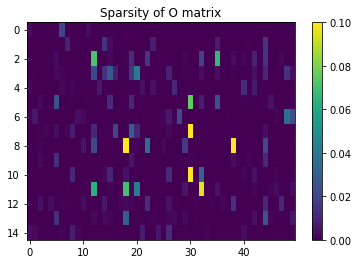

///State =  0 , top N prob obs:  ['die', 'end', 'spend', 'dwell', 'prove', 'kind', 'boast', 'decay', 'write', 'seen', 'dead', 'west', 'cross', 'mad', 'grows'] ///
///State =  1 , top N prob obs:  ['be', 'have', 'doth', 'see', 'do', 'am', 'did', 'in', 'a', 'time', 'now', 'not', 'say', 'so', 'are'] ///
///State =  2 , top N prob obs:  ['that', 'with', 'and', 'for', 'not', 'what', 'i', 'thou', 'when', 'which', 'his', 'you', 'a', 'her', 'he'] ///
///State =  3 , top N prob obs:  ['but', 'and', 'by', 'when', 'love', 'art', 'for', 'that', 'if', 'as', 'nor', 'o', 'then', 'in', 'self'] ///
///State =  4 , top N prob obs:  ['lie', 'night', 'gone', 'lies', 'seen', 'still', 'bright', 'tell', 'appear', 'true', 'green', 'use', 'old', 'write', 'stay'] ///
///State =  5 , top N prob obs:  ['of', 'in', 'to', 'on', 'is', 'and', 'from', 'with', 'hath', 'all', 'upon', 'by', 'are', 'as', 'for'] ///
///State =  6 , top N prob obs:  ['self', 'heart', 'love', 'sweet', 'own', 'eye', 'fair', 'mind', 'name', 'b

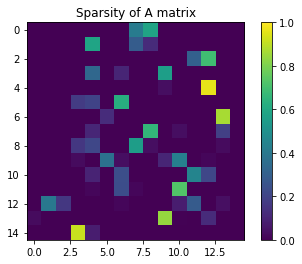

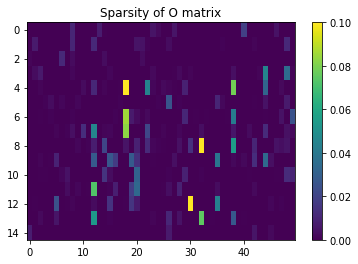

///State =  0 , top N prob obs:  ['lies', 'live', 'stay', 'end', 'brow', 'pride', 'might', 'appear', 'grow', 'show', 'same', 'stand', 'dwell', 'mayst', 'decease'] ///
///State =  1 , top N prob obs:  ['love', 'heart', 'will', 'even', 'part', 'self', 'that', 'though', 'not', 'might', 'which', 'beauty', 'desire', 'worth', 'power'] ///
///State =  2 , top N prob obs:  ['thee', 'me', 'you', 'die', 'hate', 'youth', 'write', 'men', 'one', 'call', 'decay', 'sing', 'tell', 'know', 'now'] ///
///State =  3 , top N prob obs:  ['a', 'self', 'me', 'thee', 'every', 'you', 'they', 'fair', 'love', 'are', 'gentle', 'mistress', 'life', 'days', "love's"] ///
///State =  4 , top N prob obs:  ['the', 'my', 'thy', 'his', 'your', 'a', 'thee', 'be', 'this', 'their', 'am', 'me', 'have', 'that', 'it'] ///
///State =  5 , top N prob obs:  ['eyes', 'heart', 'in', 'night', 'most', 'than', 'face', 'with', 'still', 'back', 'fire', 'on', 'is', 'had', 'will'] ///
///State =  6 , top N prob obs:  ['my', 'the', 'and', 

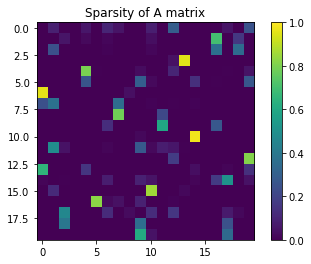

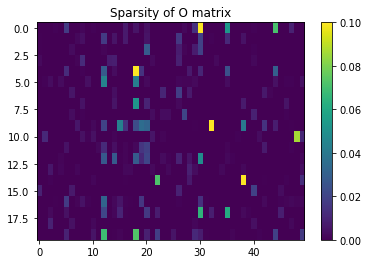

///State =  0 , top N prob obs:  ['to', 'a', 'with', 'of', 'doth', 'so', 'more', 'and', 'mine', 'from', 'in', 'their', 'every', 'thine', 'or'] ///
///State =  1 , top N prob obs:  ['do', 'have', 'no', 'this', 'can', 'you', 'it', 'they', 'shall', 'i', 'love', 'to', 'may', 'will', 'me'] ///
///State =  2 , top N prob obs:  ['me', 'not', 'and', 'i', 'it', 'you', 'but', 'who', 'to', 'look', 'what', 'yet', 'see', 'such', 'how'] ///
///State =  3 , top N prob obs:  ['days', 'night', 'away', 'sight', 'light', 'woe', 'alone', 'might', 'appear', 'ill', 'place', 'prove', 'end', 'eyes', 'age'] ///
///State =  4 , top N prob obs:  ['the', 'of', 'a', 'that', 'with', 'nor', 'and', 'which', 'like', 'on', 'as', 'from', 'in', 'to', 'hath'] ///
///State =  5 , top N prob obs:  ['that', 'the', 'love', 'when', 'or', 'beauty', 'which', 'o', 'you', 'so', 'heart', 'for', 'thoughts', 'men', 'glass'] ///
///State =  6 , top N prob obs:  ['thee', 'me', 'and', 'than', 'now', 'be', 'eyes', 'show', 'say', 'before'

In [ ]:
# version 1.5.2
# tune hyper-params
# "Keyboard Interupt" as current params are enough
syllable_filename = "./project3/data/Syllable_dictionary.txt"
rhyme_filename = "./project3/data/shakespeare.txt"
sha_filename = "./project3/data/shakespeare.txt"

num_hidden_states = [15, 20]
iterations = [50, 100, 150]
num_obs_displayed = 15

hmms, poems_output, state_obs_topN_list = rhyme_HMM_main_old(num_hidden_states, iterations, num_obs_displayed, syllable_filename, rhyme_filename, sha_filename)



In [ ]:
import heapq
count = 1
state_state_trans_list = []
for hmm in hmms:
    print("Model " + str(count))
    state_state_trans = collections.defaultdict(list)
    for i in range(len(hmm.A)):
        temp = []
        for j in range(len(hmm.A[i])):
            heapq.heappush(temp, (hmm.A[i][j], j))
        top_N = heapq.nlargest(5, temp)
        state_state_trans[i] = top_N
    for key, value in state_state_trans.items():
        print("Current state = ", key, ", Transition: ", value)
    state_state_trans_list.append(state_state_trans)    
    count += 1
    print("___________________")

count of puncs =  0
***************************** Hidden States Start! *****************************
Current number of hidden states =  5
----------------------- Iteration Start! -----------------------
Current iteration times =  50
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
_________________ HERE ___ Train done ___ HERE _________________
+++++++++ Current Poem Start! ++++++++
of than thy sweet where thy shall with have look
i the prophetic but sweetest a have
day i verses by finds and body's look
be friend be covetous term see who have
forwards self where world use beauty that art
in more write my thou world that babe anew
hence make for curse pleasure those as an art
with can find the but my even anew
termed thy for a dry to greatest mind me
nature's new 'gainst most perhaps air the mine
much if clerk we of judgment's being trust me
trespass conquest still main aside define
bath should that me the her which thy word words
pearl of and did found that fairest

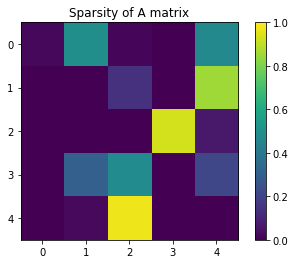

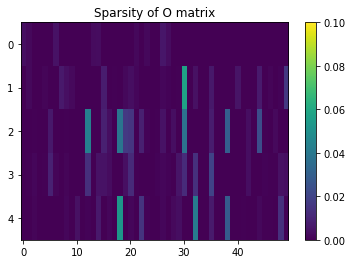

///State =  0 , top N prob obs:  ['night', 'lie', 'decay', 'brow', 'prove', 'sight', 'days', 'away', 'end', 'stay', 'delight', 'eyes', 'woe', 'way', 'spent'] ///
///State =  1 , top N prob obs:  ['to', 'be', 'is', 'sweet', 'doth', 'art', 'are', 'so', 'do', 'or', 'will', 'then', 'have', 'love', 'my'] ///
///State =  2 , top N prob obs:  ['and', 'my', 'of', 'that', 'the', 'to', 'i', 'thy', 'in', 'a', 'me', 'as', 'not', 'but', 'it'] ///
///State =  3 , top N prob obs:  ['in', 'for', 'with', 'love', 'of', 'thou', 'that', 'thee', 'to', 'but', 'is', 'all', 'mine', 'what', 'when'] ///
///State =  4 , top N prob obs:  ['the', 'thou', 'i', 'thy', 'not', 'love', 'his', 'self', 'you', 'be', 'your', 'thee', 'and', 'all', 'this'] ///
----------------------- Iteration End! ------------------------
----------------------- Iteration Start! -----------------------
Current iteration times =  100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 

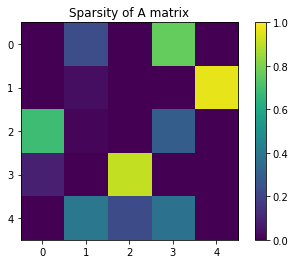

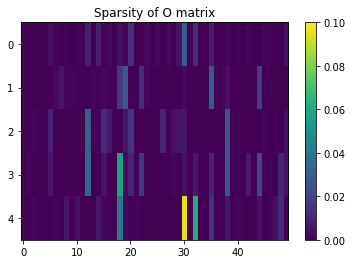

///State =  0 , top N prob obs:  ['in', 'i', 'to', 'is', 'for', 'of', 'on', 'all', 'mine', 'but', 'beauty', 'thou', 'no', 'so', 'you'] ///
///State =  1 , top N prob obs:  ['with', 'as', 'and', 'have', 'be', 'a', 'art', 'the', 'thee', 'his', 'dost', 'make', 'am', 'so', 'will'] ///
///State =  2 , top N prob obs:  ['my', 'of', 'that', 'thy', 'in', 'me', 'it', 'do', 'but', 'your', 'all', 'for', 'by', 'be', 'thee'] ///
///State =  3 , top N prob obs:  ['and', 'the', 'that', 'thy', 'of', 'a', 'love', 'not', 'which', 'his', 'in', 'or', 'so', 'when', 'but'] ///
///State =  4 , top N prob obs:  ['to', 'i', 'thou', 'the', 'thee', 'is', 'with', 'more', 'self', 'so', 'doth', 'this', 'they', 'can', 'fair'] ///
----------------------- Iteration End! ------------------------
----------------------- Iteration Start! -----------------------
Current iteration times =  120
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Itera

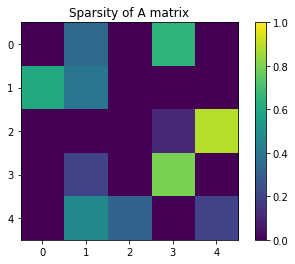

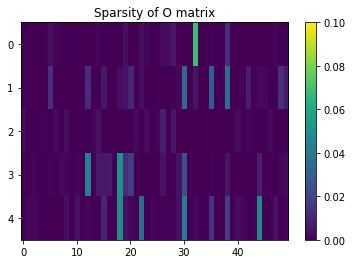

///State =  0 , top N prob obs:  ['thou', 'and', 'of', 'love', 'it', 'thy', 'your', 'let', 'in', 'give', 'see', 'who', 'still', 'not', 'live'] ///
///State =  1 , top N prob obs:  ['in', 'and', 'thy', 'my', 'me', 'to', 'with', 'for', 'thee', 'is', 'all', 'on', 'this', 'or', 'self'] ///
///State =  2 , top N prob obs:  ['be', 'night', 'day', 'heart', 'sight', 'in', 'eyes', 'face', 'eye', 'part', 'truth', 'state', 'days', 'pen', 'deeds'] ///
///State =  3 , top N prob obs:  ['i', 'the', 'that', 'of', 'to', 'my', 'not', 'so', 'but', 'when', 'which', 'you', 'do', 'as', 'be'] ///
///State =  4 , top N prob obs:  ['of', 'the', 'a', 'my', 'to', 'his', 'doth', 'and', 'thy', 'their', 'with', 'your', 'by', 'thee', 'so'] ///
----------------------- Iteration End! ------------------------
----------------------- Iteration Start! -----------------------
Current iteration times =  150
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iter

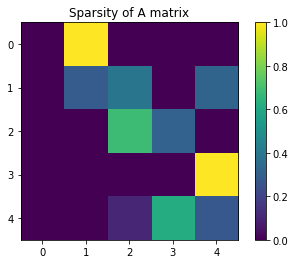

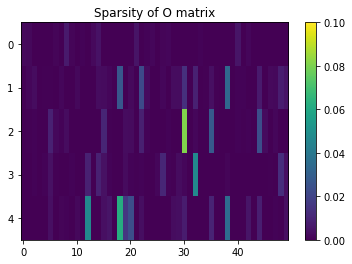

///State =  0 , top N prob obs:  ['sight', 'alone', 'night', 'days', 'decay', 'heart', 'day', 'might', 'away', 'pride', 'woe', 'brow', 'prove', 'part', 'end'] ///
///State =  1 , top N prob obs:  ['my', 'thy', 'the', 'be', 'his', 'doth', 'their', 'to', 'your', 'thee', 'is', 'thou', 'self', 'her', 'a'] ///
///State =  2 , top N prob obs:  ['to', 'and', 'in', 'me', 'with', 'thee', 'a', 'i', 'of', 'are', 'this', 'on', 'all', 'by', 'you'] ///
///State =  3 , top N prob obs:  ['i', 'thou', 'love', 'not', 'in', 'you', 'self', 'it', 'all', 'eyes', 'for', 'beauty', 'heart', 'time', 'then'] ///
///State =  4 , top N prob obs:  ['the', 'my', 'of', 'that', 'and', 'thy', 'is', 'but', 'so', 'in', 'which', 'for', 'as', 'when', 'your'] ///
----------------------- Iteration End! ------------------------
----------------------- Iteration Start! -----------------------
Current iteration times =  200
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iterati

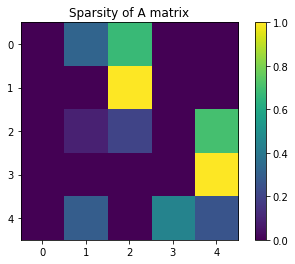

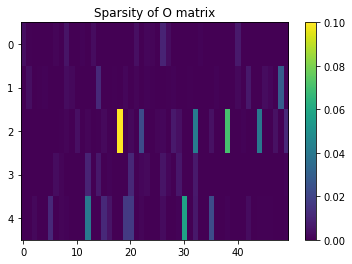

///State =  0 , top N prob obs:  ['sight', 'away', 'alone', 'state', 'days', 'eyes', 'brow', 'show', 'night', 'gone', 'spent', 'rhyme', 'light', 'skill', 'lies'] ///
///State =  1 , top N prob obs:  ['love', 'self', 'of', 'heart', 'art', 'time', 'and', 'beauty', 'world', 'fair', 'will', 'day', 'part', 'where', 'muse'] ///
///State =  2 , top N prob obs:  ['the', 'my', 'thy', 'thou', 'a', 'be', 'your', 'his', 'this', 'sweet', 'not', 'of', 'it', 'me', 'thee'] ///
///State =  3 , top N prob obs:  ['me', 'i', 'thee', 'you', 'not', 'love', 'it', 'but', 'that', 'which', 'o', 'live', 'say', 'who', 'thou'] ///
///State =  4 , top N prob obs:  ['and', 'to', 'in', 'that', 'of', 'i', 'is', 'for', 'with', 'but', 'as', 'all', 'so', 'do', 'when'] ///
----------------------- Iteration End! ------------------------
----------------------- Iteration Start! -----------------------
Current iteration times =  250
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration

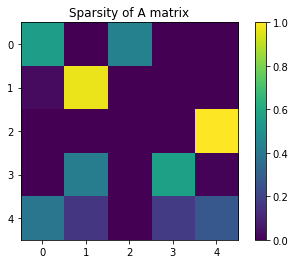

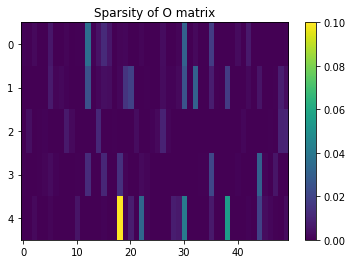

///State =  0 , top N prob obs:  ['of', 'and', 'that', 'to', 'is', 'with', 'which', 'for', 'be', 'by', 'all', 'so', 'me', 'you', 'thee'] ///
///State =  1 , top N prob obs:  ['i', 'and', 'thou', 'my', 'to', 'that', 'but', 'not', 'in', 'thy', 'for', 'love', 'as', 'so', 'me'] ///
///State =  2 , top N prob obs:  ['heart', 'time', 'world', 'beauty', 'sweet', 'self', 'love', 'eyes', 'day', 'part', 'hand', 'face', 'eye', 'sight', 'praise'] ///
///State =  3 , top N prob obs:  ['in', 'a', 'is', 'with', 'doth', 'me', 'the', 'that', 'by', 'one', 'more', 'thee', 'some', 'all', 'on'] ///
///State =  4 , top N prob obs:  ['the', 'my', 'thy', 'to', 'his', 'your', 'in', 'a', 'no', 'have', 'their', 'thee', 'i', 'doth', 'of'] ///
----------------------- Iteration End! ------------------------
***************************** Hidden States End! *****************************
***************************** Hidden States Start! *****************************
Current number of hidden states =  8
--------------

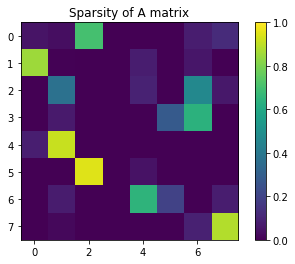

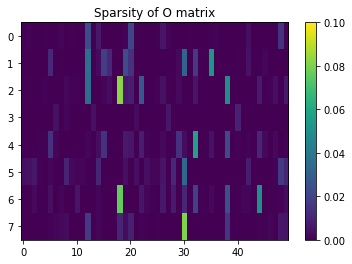

///State =  0 , top N prob obs:  ['and', 'love', 'which', 'that', 'but', 'i', 'heart', 'beauty', 'is', 'self', 'so', 'he', 'it', 'what', 'world'] ///
///State =  1 , top N prob obs:  ['of', 'with', 'is', 'and', 'that', 'to', 'i', 'in', 'as', 'by', 'not', 'thou', 'doth', 'but', 'hath'] ///
///State =  2 , top N prob obs:  ['my', 'the', 'thy', 'that', 'your', 'and', 'his', 'their', 'so', 'her', 'more', 'but', 'you', 'me', 'a'] ///
///State =  3 , top N prob obs:  ['thee', 'night', 'prove', 'lies', 'store', 'face', 'decay', 'ill', 'gone', 'stay', 'lie', 'seen', 'wrong', 'brow', 'alone'] ///
///State =  4 , top N prob obs:  ['thou', 'no', 'in', 'not', 'thy', 'thee', 'mine', 'all', 'when', 'from', 'by', 'this', 'and', 'doth', 'thine'] ///
///State =  5 , top N prob obs:  ['to', 'self', 'be', 'own', 'sight', 'sweet', 'time', 'might', 'are', 'on', 'mind', 'days', 'fair', 'nor', 'gentle'] ///
///State =  6 , top N prob obs:  ['the', 'in', 'a', 'be', 'all', 'thy', 'it', 'thou', 'are', 'art', 'm

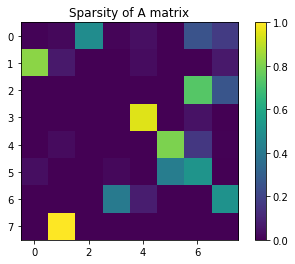

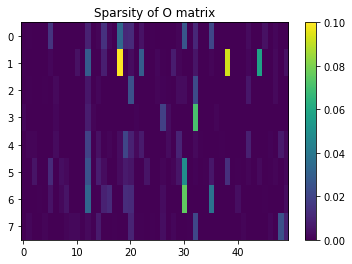

///State =  0 , top N prob obs:  ['in', 'of', 'and', 'the', 'for', 'to', 'with', 'all', 'on', 'is', 'from', 'by', 'but', 'as', 'thou'] ///
///State =  1 , top N prob obs:  ['the', 'my', 'thy', 'a', 'his', 'that', 'no', 'in', 'your', 'their', 'all', 'this', 'her', 'me', 'by'] ///
///State =  2 , top N prob obs:  ['not', 'but', 'thou', 'i', 'thee', 'and', 'you', 'now', 'beauty', 'which', 'there', 'even', 'youth', 'nothing', 'some'] ///
///State =  3 , top N prob obs:  ['i', 'thou', 'it', 'you', 'they', 'me', 'eyes', 'he', 'love', 'eye', 'she', 'how', 'now', 'still', 'mine'] ///
///State =  4 , top N prob obs:  ['and', 'be', 'when', 'for', 'what', 'have', 'as', 'me', 'that', 'if', 'thee', 'more', 'or', 'which', 'mine'] ///
///State =  5 , top N prob obs:  ['i', 'to', 'thee', 'not', 'that', 'my', 'your', 'so', 'me', 'love', 'thy', 'from', 'you', 'this', 'make'] ///
///State =  6 , top N prob obs:  ['to', 'and', 'of', 'is', 'with', 'that', 'doth', 'in', 'do', 'are', 'shall', 'not', 'as', 's

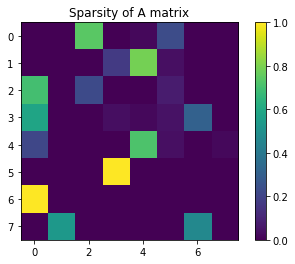

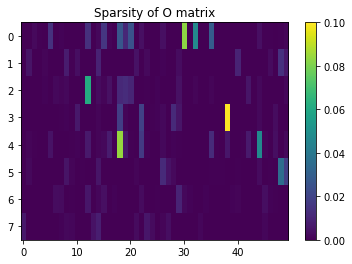

///State =  0 , top N prob obs:  ['to', 'i', 'and', 'in', 'thou', 'of', 'with', 'the', 'but', 'for', 'is', 'not', 'by', 'it', 'from'] ///
///State =  1 , top N prob obs:  ['doth', 'sight', 'self', 'ill', 'brow', 'lies', 'heart', 'time', 'best', 'face', 'day', 'night', 'might', 'men', 'way'] ///
///State =  2 , top N prob obs:  ['that', 'and', 'when', 'love', 'if', 'which', 'not', 'this', 'thee', 'do', 'o', 'have', 'you', 'as', 'what'] ///
///State =  3 , top N prob obs:  ['thy', 'my', 'be', 'your', 'no', 'their', 'more', 'his', 'the', 'her', 'so', 'are', 'own', 'being', 'make'] ///
///State =  4 , top N prob obs:  ['the', 'of', 'my', 'a', 'his', 'be', 'and', 'with', 'in', 'all', 'your', 'eye', 'every', 'is', 'so'] ///
///State =  5 , top N prob obs:  ['love', 'self', 'me', 'thee', 'heart', 'sweet', 'fair', 'eyes', 'will', 'him', 'worth', 'praise', 'verse', 'name', 'life'] ///
///State =  6 , top N prob obs:  ['thee', 'me', 'this', 'all', 'art', 'have', 'mine', 'is', 'can', 'see', 'am',

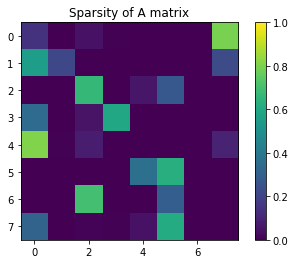

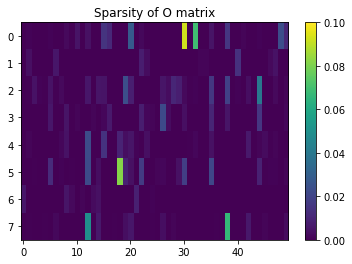

///State =  0 , top N prob obs:  ['to', 'i', 'thou', 'in', 'but', 'doth', 'love', 'self', 'for', 'thy', 'by', 'you', 'should', 'heart', 'sweet'] ///
///State =  1 , top N prob obs:  ['me', 'sight', 'prove', 'lies', 'alone', 'decay', 'stay', 'lie', 'mind', 'his', 'store', 'grief', 'cold', 'brow', 'night'] ///
///State =  2 , top N prob obs:  ['a', 'so', 'and', 'be', 'as', 'mine', 'is', 'thy', 'more', 'with', 'are', 'in', 'do', 'eye', 'every'] ///
///State =  3 , top N prob obs:  ['thee', 'eyes', 'no', 'have', 'their', 'be', 'am', 'a', 'is', 'her', 'still', 'find', 'and', 'with', 'end'] ///
///State =  4 , top N prob obs:  ['in', 'and', 'be', 'that', 'love', 'when', 'art', 'is', 'by', 'make', 'are', 'do', 'am', 'the', 'may'] ///
///State =  5 , top N prob obs:  ['the', 'of', 'and', 'not', 'that', 'with', 'all', 'to', 'his', 'me', 'for', 'is', 'in', 'thee', 'from'] ///
///State =  6 , top N prob obs:  ['heart', 'days', 'woe', 'part', 'sight', 'day', 'pride', 'light', 'spent', 'memory', 'i

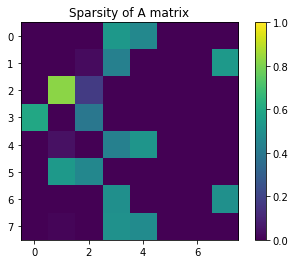

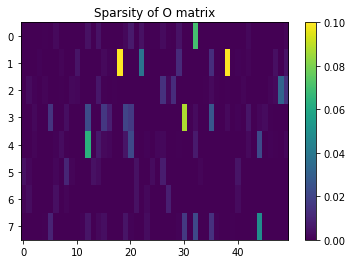

///State =  0 , top N prob obs:  ['thou', 'thee', 'you', 'it', 'not', 'me', 'love', 'how', 'this', 'more', 'why', 'then', 'one', 'she', 'what'] ///
///State =  1 , top N prob obs:  ['the', 'my', 'thy', 'your', 'his', 'mine', 'their', 'me', 'no', 'her', 'with', 'more', 'thine', 'be', 'this'] ///
///State =  2 , top N prob obs:  ['self', 'love', 'and', 'heart', 'eyes', 'sweet', 'eye', 'own', 'beauty', 'world', 'fair', 'will', 'name', 'time', 'worth'] ///
///State =  3 , top N prob obs:  ['and', 'to', 'of', 'in', 'is', 'for', 'with', 'that', 'as', 'so', 'or', 'doth', 'but', 'by', 'on'] ///
///State =  4 , top N prob obs:  ['i', 'that', 'not', 'a', 'but', 'if', 'which', 'do', 'thee', 'when', 'o', 'me', 'so', 'love', 'they'] ///
///State =  5 , top N prob obs:  ['sight', 'days', 'pride', 'might', 'brow', 'night', 'alone', 'state', 'end', 'way', 'rhyme', 'ill', 'delight', 'away', 'tongue'] ///
///State =  6 , top N prob obs:  ['lie', 'prove', 'stay', 'spent', 'woe', 'away', 'spend', 'bright'

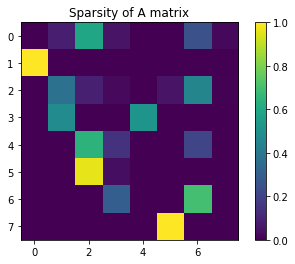

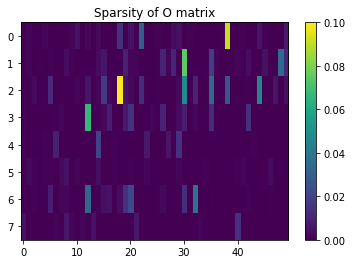

///State =  0 , top N prob obs:  ['my', 'thy', 'your', 'his', 'mine', 'not', 'the', 'one', 'more', 'her', 'beauty', 'every', 'dear', 'this', 'sweet'] ///
///State =  1 , top N prob obs:  ['of', 'to', 'self', 'love', 'on', 'with', 'heart', 'eye', 'sweet', 'own', 'beauty', 'eyes', 'as', 'will', 'name'] ///
///State =  2 , top N prob obs:  ['the', 'to', 'a', 'in', 'of', 'with', 'my', 'be', 'thy', 'doth', 'is', 'by', 'their', 'no', 'his'] ///
///State =  3 , top N prob obs:  ['and', 'that', 'or', 'so', 'i', 'is', 'for', 'are', 'which', 'but', 'do', 'where', 'with', 'than', 'eyes'] ///
///State =  4 , top N prob obs:  ['thee', 'love', 'time', 'thine', 'more', 'me', 'world', 'best', 'you', 'die', 'heart', 'dead', 'art', 'bear', 'this'] ///
///State =  5 , top N prob obs:  ['thee', 'me', 'youth', 'did', 'praise', 'true', 'now', 'can', 'gentle', 'you', 'ill', 'beauty', 'well', 'hell', 'brow'] ///
///State =  6 , top N prob obs:  ['i', 'thou', 'that', 'in', 'not', 'but', 'for', 'so', 'it', 'whe

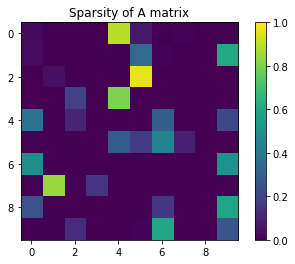

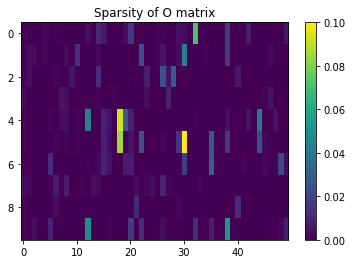

///State =  0 , top N prob obs:  ['i', 'thou', 'not', 'it', 'thy', 'you', 'but', 'he', 'they', 'or', 'beauty', 'time', 'so', 'she', 'fair'] ///
///State =  1 , top N prob obs:  ['my', 'to', 'doth', 'his', 'more', 'can', 'did', 'have', 'thy', 'gentle', 'heart', 'your', "beauty's", 'true', 'another'] ///
///State =  2 , top N prob obs:  ['be', 'own', 'eye', 'eyes', 'make', 'thee', 'show', 'me', 'time', 'world', 'live', 'dead', 'new', 'bear', 'face'] ///
///State =  3 , top N prob obs:  ['night', 'lie', 'true', 'day', 'show', 'near', 'bright', 'well', 'old', 'gone', 'kind', 'stay', 'slow', 'behind', 'look'] ///
///State =  4 , top N prob obs:  ['the', 'and', 'that', 'is', 'a', 'of', 'so', 'as', 'do', 'when', 'which', 'if', 'doth', 'be', 'this'] ///
///State =  5 , top N prob obs:  ['to', 'the', 'mine', 'with', 'his', 'not', 'a', 'can', 'this', 'thy', 'shall', 'your', 'are', 'thine', 'their'] ///
///State =  6 , top N prob obs:  ['of', 'in', 'love', 'with', 'on', 'self', 'for', 'to', 'o', 

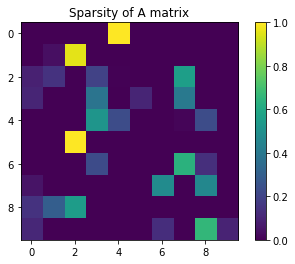

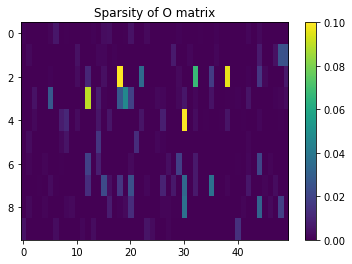

///State =  0 , top N prob obs:  ['be', 'not', 'me', 'see', 'live', 'am', 'make', 'was', 'show', 'say', 'know', 'come', 'tell', 'no', 'give'] ///
///State =  1 , top N prob obs:  ['art', 'love', 'self', 'sweet', 'fair', 'heart', 'world', 'dear', 'true', 'nor', 'age', 'name', 'poor', 'night', 'pleasure'] ///
///State =  2 , top N prob obs:  ['my', 'the', 'thy', 'thou', 'your', 'his', 'so', 'no', 'and', 'their', 'this', 'with', 'a', 'are', 'not'] ///
///State =  3 , top N prob obs:  ['that', 'as', 'thee', 'when', 'me', 'from', 'if', 'the', 'for', 'you', 'which', 'what', 'but', 'not', 'it'] ///
///State =  4 , top N prob obs:  ['i', 'to', 'have', 'do', 'shall', 'it', 'they', 'doth', 'will', 'can', 'did', 'may', 'you', 'must', 'be'] ///
///State =  5 , top N prob obs:  ['sight', 'heart', 'time', 'long', 'tongue', 'mind', 'memory', 'days', 'art', 'store', 'ill', 'part', 'skill', 'wide', 'head'] ///
///State =  6 , top N prob obs:  ['mine', 'me', 'thee', 'you', 'a', 'that', 'thine', 'all', '

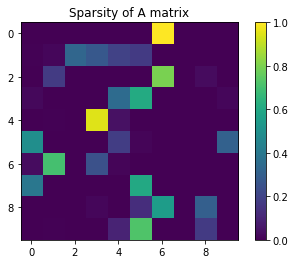

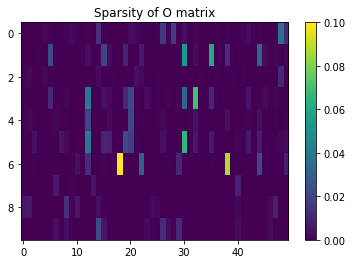

///State =  0 , top N prob obs:  ['love', 'self', 'and', 'own', 'eye', 'eyes', 'heart', 'time', 'sweet', 'world', 'beauty', 'fair', 'life', 'or', 'poor'] ///
///State =  1 , top N prob obs:  ['of', 'in', 'with', 'to', 'and', 'a', 'is', 'from', 'all', 'on', 'by', 'for', 'upon', 'be', 'thy'] ///
///State =  2 , top N prob obs:  ['and', 'heart', 'beauty', 'worth', 'night', 'self', 'praise', 'one', 'truth', 'day', 'store', 'love', 'will', 'brow', 'treasure'] ///
///State =  3 , top N prob obs:  ['thou', 'that', 'not', 'for', 'to', 'when', 'in', 'but', 'do', 'which', 'all', 'and', 'from', 'as', 'what'] ///
///State =  4 , top N prob obs:  ['i', 'me', 'thee', 'it', 'you', 'but', 'that', 'not', 'art', 'o', 'they', 'how', 'if', 'so', 'then'] ///
///State =  5 , top N prob obs:  ['and', 'to', 'that', 'is', 'of', 'as', 'doth', 'have', 'but', 'shall', 'or', 'do', 'are', 'i', 'am'] ///
///State =  6 , top N prob obs:  ['the', 'my', 'thy', 'your', 'his', 'this', 'a', 'their', 'be', 'so', 'no', 'min

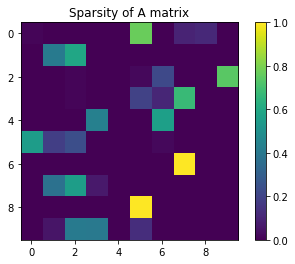

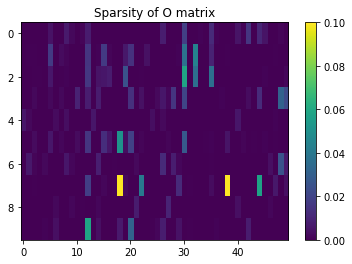

///State =  0 , top N prob obs:  ['i', 'in', 'than', 'love', 'then', 'to', 'where', 'night', 'day', 'fair', 'make', 'more', 'thus', 'most', 'still'] ///
///State =  1 , top N prob obs:  ['i', 'thou', 'to', 'thee', 'not', 'all', 'me', 'in', 'you', 'from', 'by', 'this', 'that', 'be', 'for'] ///
///State =  2 , top N prob obs:  ['and', 'of', 'to', 'in', 'is', 'with', 'thou', 'for', 'i', 'as', 'on', 'when', 'that', 'which', 'do'] ///
///State =  3 , top N prob obs:  ['self', 'be', 'sweet', 'to', 'love', 'own', 'so', 'fair', 'but', 'a', 'heart', 'are', 'being', "beauty's", 'dear'] ///
///State =  4 , top N prob obs:  ['decay', 'spent', 'sight', 'pride', 'light', 'rhyme', 'state', 'place', 'day', 'still', 'hand', 'away', 'report', 'eternity', 'decease'] ///
///State =  5 , top N prob obs:  ['the', 'me', 'be', 'my', 'doth', 'to', 'thee', 'i', 'and', 'no', 'have', 'but', 'not', 'you', 'more'] ///
///State =  6 , top N prob obs:  ['love', 'self', 'heart', 'beauty', 'eye', 'eyes', 'life', 'verse

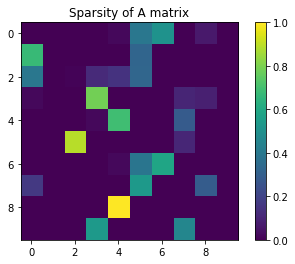

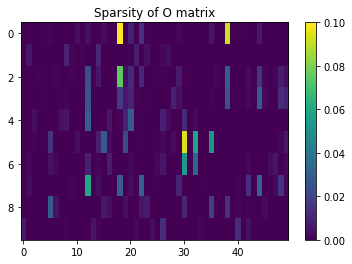

///State =  0 , top N prob obs:  ['my', 'the', 'thy', 'your', 'me', 'be', 'her', 'his', 'their', 'those', 'so', 'but', 'all', 'thee', 'make'] ///
///State =  1 , top N prob obs:  ['sight', 'heart', 'night', 'days', 'brow', 'decay', 'mind', 'pride', 'away', 'woe', 'time', 'way', 'rhyme', 'light', 'tongue'] ///
///State =  2 , top N prob obs:  ['the', 'thy', 'that', 'love', 'and', 'a', 'but', 'his', 'my', 'so', 'self', 'if', 'thine', 'which', 'when'] ///
///State =  3 , top N prob obs:  ['my', 'is', 'a', 'that', 'thy', 'and', 'it', 'no', 'doth', 'the', 'love', 'mine', 'eye', 'self', 'for'] ///
///State =  4 , top N prob obs:  ['i', 'not', 'that', 'but', 'so', 'which', 'when', 'in', 'are', 'have', 'do', 'be', 'shall', 'for', 'they'] ///
///State =  5 , top N prob obs:  ['and', 'of', 'to', 'thou', 'with', 'in', 'by', 'as', 'on', 'from', 'or', 'fair', 'for', 'time', 'world'] ///
///State =  6 , top N prob obs:  ['to', 'me', 'all', 'in', 'thou', 'for', 'this', 'of', 'not', 'and', 'i', 'thee'

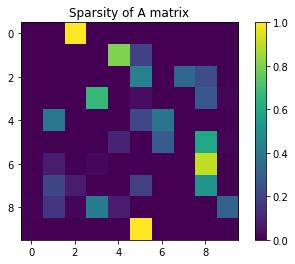

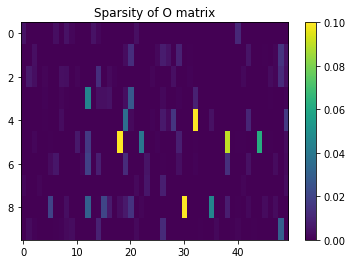

///State =  0 , top N prob obs:  ['delight', 'sight', 'days', 'night', 'lies', 'new', 'alone', 'lie', 'spent', 'pen', 'age', 'pride', 'gone', 'care', 'light'] ///
///State =  1 , top N prob obs:  ['art', 'thee', 'love', 'more', 'beauty', 'dost', 'self', 'now', 'but', 'he', 'you', 'hast', 'than', 'o', 'wilt'] ///
///State =  2 , top N prob obs:  ['me', 'doth', 'am', 'did', 'have', 'are', 'thee', 'time', 'self', 'so', 'true', 'more', 'do', 'shame', 'of'] ///
///State =  3 , top N prob obs:  ['and', 'that', 'i', 'not', 'but', 'me', 'so', 'it', 'you', 'love', 'which', 'then', 'when', 'do', 'yet'] ///
///State =  4 , top N prob obs:  ['thou', 'of', 'on', 'as', 'or', 'what', 'it', 'and', 'sweet', 'in', 'own', 'for', 'still', 'are', 'more'] ///
///State =  5 , top N prob obs:  ['the', 'my', 'thy', 'a', 'his', 'your', 'i', 'be', 'their', 'mine', 'no', 'that', 'her', 'this', 'every'] ///
///State =  6 , top N prob obs:  ['be', 'have', 'me', 'this', 'thee', 'all', 'that', 'when', 'if', 'see', 'm

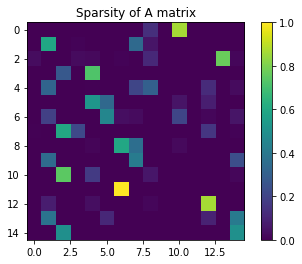

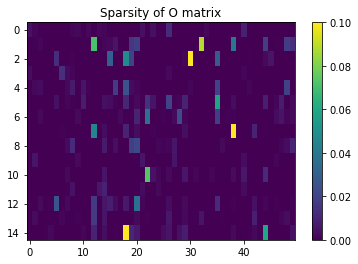

///State =  0 , top N prob obs:  ['new', 'seen', 'ill', 'end', 'pride', 'night', 'pen', 'eyes', 'light', 'lies', 'still', 'part', 'woe', 'decay', 'strange'] ///
///State =  1 , top N prob obs:  ['thou', 'that', 'my', 'thy', 'for', 'which', 'and', 'love', 'a', 'but', 'self', 'when', 'art', 'on', 'as'] ///
///State =  2 , top N prob obs:  ['to', 'in', 'of', 'and', 'the', 'is', 'by', 'with', 'as', 'hath', 'all', 'for', 'i', 'nor', 'from'] ///
///State =  3 , top N prob obs:  ['see', 'make', 'know', 'have', 'show', 'give', 'die', 'youth', 'stand', 'love', 'prove', 'find', 'tell', 'live', 'take'] ///
///State =  4 , top N prob obs:  ['i', 'and', 'is', 'the', 'can', 'they', 'he', 'not', 'with', 'self', 'doth', 'fair', 'should', 'of', 'who'] ///
///State =  5 , top N prob obs:  ['with', 'not', 'mine', 'are', 'no', 'in', 'eyes', 'thee', 'of', 'see', 'so', 'have', 'his', 'or', 'am'] ///
///State =  6 , top N prob obs:  ['so', 'more', 'his', 'be', 'own', 'you', 'old', 'with', 'doth', 'being', 'y

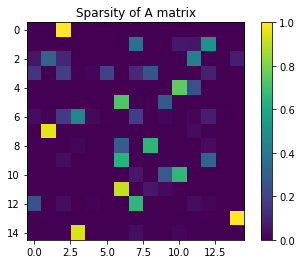

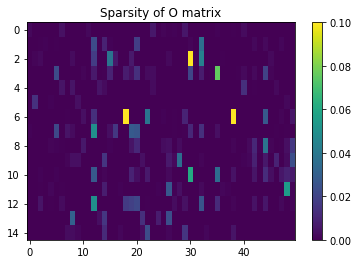

///State =  0 , top N prob obs:  ['thee', 'be', 'make', 'art', 'me', 'love', 'new', 'say', 'nothing', 'give', 'look', 'this', 'stay', 'night', 'come'] ///
///State =  1 , top N prob obs:  ['i', 'thou', 'it', 'you', 'so', 'that', 'not', 'then', 'is', 'but', 'and', 'more', 'he', 'o', 'me'] ///
///State =  2 , top N prob obs:  ['and', 'to', 'of', 'thou', 'by', 'on', 'are', 'or', 'hath', 'that', 'have', 'doth', 'can', 'will', 'no'] ///
///State =  3 , top N prob obs:  ['of', 'in', 'with', 'is', 'for', 'all', 'doth', 'from', 'to', 'a', 'but', 'and', 'by', 'this', 'upon'] ///
///State =  4 , top N prob obs:  ['show', 'decay', 'spent', 'face', 'sing', 'lies', 'away', 'know', 'change', 'spend', 'thought', 'be', 'still', 'thee', 'tell'] ///
///State =  5 , top N prob obs:  ['eye', 'sight', 'state', 'verse', 'part', 'desire', 'pride', 'heart', 'breast', 'brow', 'end', 'night', 'kind', 'day', 'pleasure'] ///
///State =  6 , top N prob obs:  ['the', 'my', 'thy', 'his', 'your', 'their', 'a', 'mine'

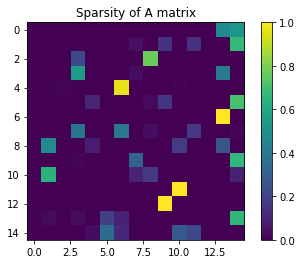

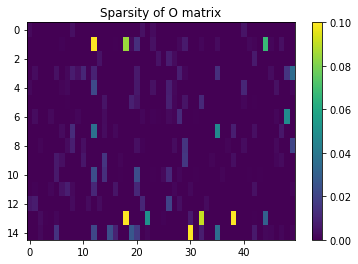

///State =  0 , top N prob obs:  ['sight', 'lie', 'decay', 'mind', 'store', 'dwell', 'way', 'brow', 'wrong', 'state', 'sing', 'heart', 'tongue', 'spend', 'grow'] ///
///State =  1 , top N prob obs:  ['that', 'the', 'a', 'when', 'thee', 'your', 'make', 'love', 'this', 'but', 'if', 'what', 'whose', 'every', 'though'] ///
///State =  2 , top N prob obs:  ['sight', 'delight', 'part', 'face', 'before', 'pride', 'pen', 'rhyme', 'state', 'place', 'spent', 'eye', 'stand', 'end', 'ill'] ///
///State =  3 , top N prob obs:  ['is', 'sweet', 'which', 'best', 'no', 'of', 'self', 'now', 'with', 'not', 'heart', "beauty's", "love's", 'that', 'beauty'] ///
///State =  4 , top N prob obs:  ['and', 'thee', 'be', 'are', 'is', 'me', 'hath', 'that', 'away', 'alone', 'of', 'hand', 'out', 'both', 'shall'] ///
///State =  5 , top N prob obs:  ['thee', 'me', 'not', 'love', 'it', 'you', 'i', 'all', 'so', 'when', 'him', 'thou', 'for', 'eyes', 'as'] ///
///State =  6 , top N prob obs:  ['love', 'self', 'art', 'hea

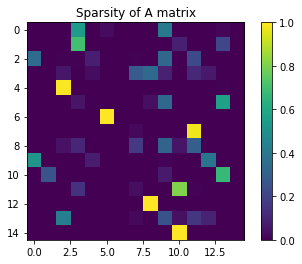

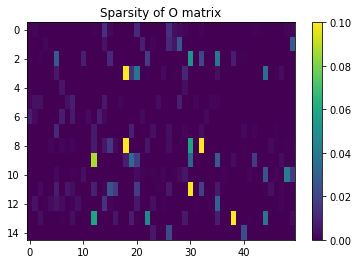

///State =  0 , top N prob obs:  ['love', 'heart', 'one', 'me', 'eye', 'time', 'world', 'eyes', 'it', 'beauty', 'and', 'than', 'but', 'you', 'more'] ///
///State =  1 , top N prob obs:  ['when', 'sweet', 'own', 'fair', 'eye', 'true', 'night', 'eyes', 'thing', 'so', 'same', 'which', 'being', 'still', 'memory'] ///
///State =  2 , top N prob obs:  ['is', 'in', 'to', 'with', 'for', 'you', 'from', 'all', 'can', 'thou', 'i', 'they', 'his', 'on', 'no'] ///
///State =  3 , top N prob obs:  ['the', 'my', 'so', 'not', 'but', 'be', 'a', 'mine', 'this', 'more', 'your', 'as', 'thee', 'dost', 'her'] ///
///State =  4 , top N prob obs:  ['thee', 'me', "'t", 'see', 'dead', 'alone', 'know', 'be', 'ill', 'end', 'away', 'show', 'were', 'best', 'found'] ///
///State =  5 , top N prob obs:  ['me', 'their', 'sight', 'more', 'cold', 'be', 'brow', 'own', 'might', 'gentle', 'life', 'one', 'praise', 'outward', 'show'] ///
///State =  6 , top N prob obs:  ['days', 'pride', 'sight', 'tell', 'light', 'woe', 'age'

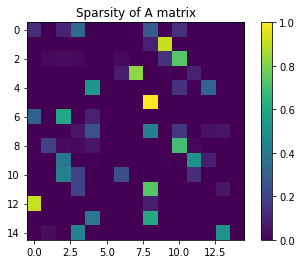

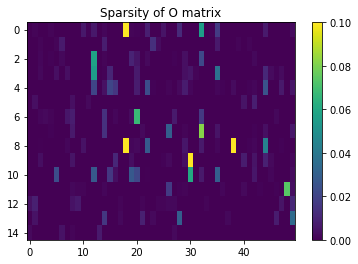

///State =  0 , top N prob obs:  ['the', 'thou', 'no', 'have', 'fair', 'with', 'old', 'they', 'own', 'better', 'more', 'see', 'his', 'there', 'gentle'] ///
///State =  1 , top N prob obs:  ['be', 'make', 'not', 'tell', 'show', 'of', 'give', 'see', 'bear', 'say', 'all', 'thee', 'live', 'keep', 'true'] ///
///State =  2 , top N prob obs:  ['i', 'that', 'thee', 'not', 'me', 'you', 'it', 'thou', 'then', 'he', 'love', 'o', 'they', 'and', 'so'] ///
///State =  3 , top N prob obs:  ['and', 'that', 'with', 'nor', 'no', 'so', 'are', 'than', 'hath', 'art', 'not', 'dost', 'shall', 'a', 'by'] ///
///State =  4 , top N prob obs:  ['of', 'a', 'his', 'that', 'by', 'or', 'which', 'all', 'more', 'should', 'mine', 'well', 'one', 'this', 'those'] ///
///State =  5 , top N prob obs:  ['sight', 'mind', 'way', 'view', 'wrong', 'show', 'store', 'brow', 'deeds', 'part', 'treasure', 'head', 'spent', 'twain', 'remain'] ///
///State =  6 , top N prob obs:  ['but', 'which', 'or', 'more', 'look', 'thou', 'is', 'th

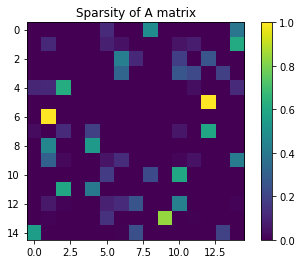

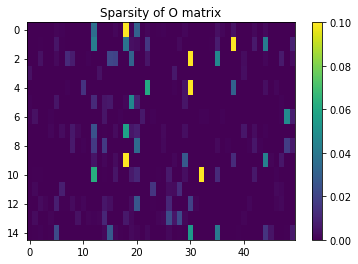

///State =  0 , top N prob obs:  ['the', 'and', 'that', 'but', 'me', 'thee', 'some', 'which', 'is', 'are', 'it', 'hath', 'or', 'their', 'o'] ///
///State =  1 , top N prob obs:  ['my', 'of', 'thy', 'that', 'a', 'the', 'your', 'and', 'his', 'so', 'their', 'no', 'this', 'thee', 'her'] ///
///State =  2 , top N prob obs:  ['to', 'doth', 'with', 'and', 'not', 'as', 'shall', 'can', 'did', 'by', 'will', 'should', 'may', 'no', 'in'] ///
///State =  3 , top N prob obs:  ['alone', 'pride', 'woe', 'spent', 'prove', 'light', 'day', 'sight', 'rhyme', 'respect', 'appear', 'days', 'end', 'pen', 'place'] ///
///State =  4 , top N prob obs:  ['to', 'me', 'his', 'all', 'thy', 'thee', 'mine', 'no', 'every', 'on', 'your', 'not', "beauty's", 'give', 'make'] ///
///State =  5 , top N prob obs:  ['have', 'so', 'as', 'in', 'am', 'see', 'for', 'love', 'are', 'was', 'know', "'t", 'that', 'hath', 'were'] ///
///State =  6 , top N prob obs:  ['love', 'self', 'heart', 'will', 'verse', 'mind', 'sight', 'fair', 'na

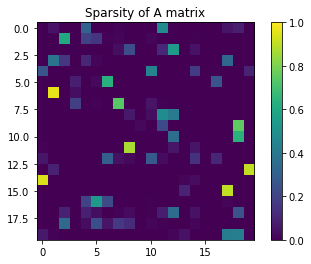

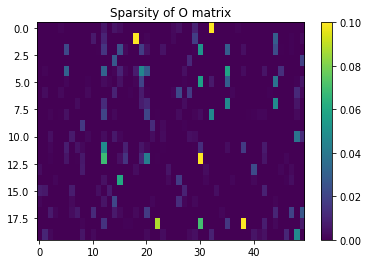

///State =  0 , top N prob obs:  ['thou', 'thee', 'love', 'beauty', 'all', 'she', 'you', 'me', 'one', 'who', 'or', 'poor', 'this', 'these', 'false'] ///
///State =  1 , top N prob obs:  ['the', 'my', 'their', 'mine', 'no', 'a', 'your', 'thine', 'me', 'some', 'more', 'that', 'or', 'an', 'so'] ///
///State =  2 , top N prob obs:  ['in', 'to', 'all', 'with', 'for', 'by', 'a', 'from', 'not', 'is', 'as', 'see', 'that', 'upon', 'be'] ///
///State =  3 , top N prob obs:  ['me', 'true', 'time', 'dear', 'thee', 'kind', 'sweet', 'full', 'night', 'ill', 'beloved', 'muse', 'cold', 'state', 'own'] ///
///State =  4 , top N prob obs:  ['and', 'for', 'in', 'with', 'of', 'on', 'as', 'that', 'from', 'but', 'are', 'or', 'making', 'doth', 'hath'] ///
///State =  5 , top N prob obs:  ['of', 'to', 'and', 'a', 'than', 'with', 'is', 'doth', 'as', 'or', 'in', 'hath', 'for', 'which', 'on'] ///
///State =  6 , top N prob obs:  ['eye', 'love', 'eyes', 'world', 'heart', 'own', 'self', 'truth', 'time', 'life', 've

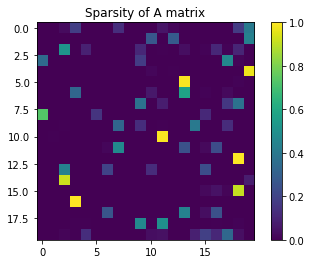

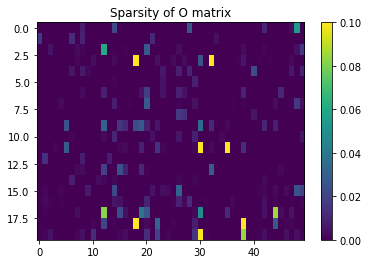

///State =  0 , top N prob obs:  ['be', 'self', 'and', 'own', 'nor', 'time', 'o', 'dost', 'art', 'make', 'more', 'yet', 'life', 'give', 'where'] ///
///State =  1 , top N prob obs:  ['lie', 'sight', 'dwell', 'deeds', 'light', 'increase', 'age', 'pride', 'new', 'die', 'ride', 'date', 'rhyme', 'memory', 'might'] ///
///State =  2 , top N prob obs:  ['and', 'i', 'that', 'have', 'love', 'but', 'my', 'which', 'you', 'what', 'when', 'sweet', 'shall', 'yet', 'if'] ///
///State =  3 , top N prob obs:  ['thou', 'the', 'so', 'me', 'mine', 'no', 'to', 'every', 'it', 'o', 'thee', 'those', 'an', 'fair', 'more'] ///
///State =  4 , top N prob obs:  ['tell', 'lies', 'hand', 'part', 'say', 'show', 'truth', 'stay', 'know', 'love', 'make', 'thee', 'will', 'fair', 'stand'] ///
///State =  5 , top N prob obs:  ['see', 'now', 'dead', 'night', 'end', 'rare', 'pen', 'gone', 'praise', 'kind', 'again', 'one', 'seen', 'prove', 'find'] ///
///State =  6 , top N prob obs:  ['i', 'not', 'nor', 'it', 'how', 'art', 

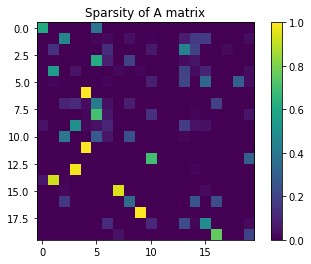

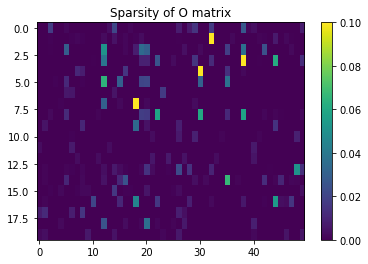

///State =  0 , top N prob obs:  ['their', 'some', 'thy', 'time', 'in', 'me', 'we', 'days', 'thou', 'before', 'ill', 'thine', 'age', 'have', 'leaves'] ///
///State =  1 , top N prob obs:  ['i', 'thou', 'not', 'it', 'you', 'they', 'how', 'beauty', 'then', 'and', 'why', 'so', 'he', 'thee', 'nor'] ///
///State =  2 , top N prob obs:  ['and', 'that', 'when', 'thy', 'so', 'as', 'what', 'if', 'but', 'for', 'from', 'where', 'are', 'be', 'nor'] ///
///State =  3 , top N prob obs:  ['my', 'thy', 'a', 'your', 'i', 'that', 'this', 'his', 'her', 'which', 'it', 'mine', 'thine', 'you', 'sweet'] ///
///State =  4 , top N prob obs:  ['to', 'doth', 'can', 'will', 'do', 'may', 'shall', 'must', 'am', 'and', 'not', 'should', 'with', 'of', 'dost'] ///
///State =  5 , top N prob obs:  ['of', 'in', 'that', 'for', 'and', 'with', 'on', 'to', 'by', 'is', 'but', 'as', 'than', 'or', 'all'] ///
///State =  6 , top N prob obs:  ['be', 'thee', 'me', 'make', 'not', 'give', 'show', 'live', 'see', 'say', 'bear', 'have'

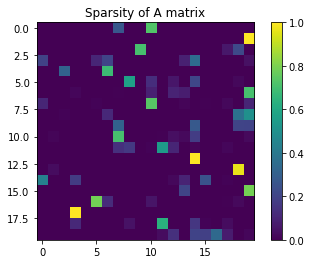

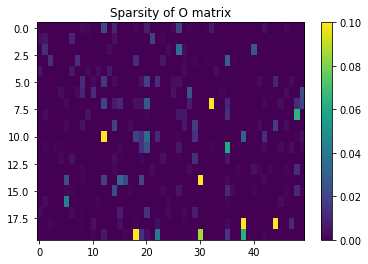

///State =  0 , top N prob obs:  ['i', 'it', 'not', 'you', 'which', 'they', 'that', 'eyes', 'he', 'how', 'beauty', 'and', 'eye', 'so', 'when'] ///
///State =  1 , top N prob obs:  ['heart', 'thee', 'decay', 'memory', 'brow', 'way', 'head', 'me', 'sight', 'state', 'pain', 'brain', 'rest', 'store', 'will'] ///
///State =  2 , top N prob obs:  ['doth', 'eyes', 'days', 'lies', 'hand', 'eye', 'day', 'gone', 'well', 'place', 'youth', 'near', 'desire', 'green', 'antique'] ///
///State =  3 , top N prob obs:  ['i', 'be', 'is', 'have', 'hath', 'with', 'well', 'never', 'we', 'the', 'live', 'did', 'praise', 'once', 'day'] ///
///State =  4 , top N prob obs:  ['sight', 'pride', 'spent', 'night', 'light', 'age', 'woe', 'lie', 'state', 'pen', 'end', 'rhyme', 'grief', 'remain', 'strange'] ///
///State =  5 , top N prob obs:  ['me', 'are', 'which', 'but', 'not', 'that', 'you', 'will', 'shall', 'his', 'may', 'might', 'so', 'thought', 'and'] ///
///State =  6 , top N prob obs:  ['more', 'own', 'me', 'sw

KeyboardInterrupt: 

In [8]:

# version 2.0
# tune hyper-params
# "Keyboard Interupt" as current params are enough
syllable_filename = "./project3/data/Syllable_dictionary.txt"
rhyme_filename = "./project3/data/shakespeare.txt"
sha_filename = "./project3/data/shakespeare.txt"

num_hidden_states = [5, 8, 10, 15, 20, 25]
iterations = [50, 100, 120, 150, 200, 250]
num_obs_displayed = 15

hmms, poems_output, state_obs_topN_list = rhyme_HMM_main(num_hidden_states, iterations, num_obs_displayed, syllable_filename, rhyme_filename, sha_filename)


count of puncs =  0
***************************** Hidden States Start! *****************************
Current number of hidden states =  10
----------------------- Iteration Start! -----------------------
Current iteration times =  100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
_________________ HERE ___ Train done ___ HERE _________________
+++++++++ Current Poem Start! ++++++++
not than for so present-absent to thee
yet she dearer the new i stretched me
to thou and friend damasked to to hath thee
to rocks loathsome to a say me see me
and look to now the son from the glass force
me imprint sorrows words what wherein youth
a shows do scythe not found as my my horse
tell too thou them eyes thou shalt for as truth
with made thy gift brand at then that my heart
greater account and why is thou right cars grow
tongue thee confined and away thou my heart
respect it after that so spirit no
dear br

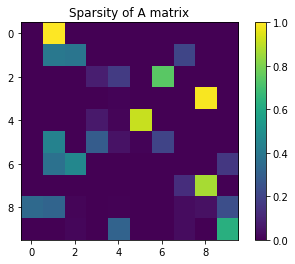

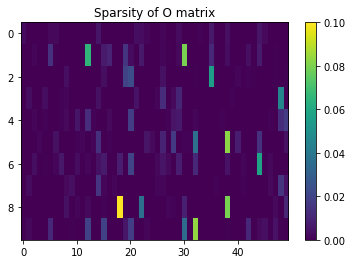

///State =  0 , top N prob obs:  ['my', 'in', 'thee', 'all', 'on', 'see', 'make', 'upon', 'me', 'this', 'for', 'show', 'know', 'is', 'tell'] ///
///State =  1 , top N prob obs:  ['to', 'of', 'that', 'in', 'i', 'and', 'which', 'for', 'as', 'what', 'from', 'is', 'or', 'thee', 'you'] ///
///State =  2 , top N prob obs:  ['with', 'not', 'when', 'so', 'for', 'but', 'are', 'more', 'have', 'as', 'do', 'and', 'o', 'like', 'am'] ///
///State =  3 , top N prob obs:  ['love', 'self', 'sight', 'heart', 'mind', 'praise', 'eyes', 'days', 'thine', 'good', 'verse', 'name', 'woe', 'state', 'beauty'] ///
///State =  4 , top N prob obs:  ['and', 'doth', 'but', 'sweet', 'is', 'dost', 'not', 'self', 'that', 'who', 'will', 'new', 'mayst', 'being', 'well'] ///
///State =  5 , top N prob obs:  ['thy', 'is', 'it', 'be', 'thou', 'were', 'own', 'or', 'your', 'eye', 'a', 'mine', 'time', 'doth', 'shall'] ///
///State =  6 , top N prob obs:  ['i', 'a', 'me', 'thee', 'be', 'you', 'not', 'no', 'but', 'so', 'then', 'h

In [13]:
# animate
syllable_filename = "./project3/data/Syllable_dictionary.txt"
rhyme_filename = "./project3/data/shakespeare.txt"
sha_filename = "./project3/data/shakespeare.txt"

num_hidden_states = [10]
iterations = [100]
num_obs_displayed = 15

syllable_dict, syllable_end_dict, rhyme_dict, obs_s, obs_map_s, obs_map_s_rev = get_dicts_preprocess(syllable_filename, rhyme_filename, sha_filename)
hmms = []
poems_output = []
state_obs_topN_list = []

for num_hs in num_hidden_states:
    print("***************************** Hidden States Start! *****************************")
    print("Current number of hidden states = ", num_hs)

    for iteration in iterations:
        print("----------------------- Iteration Start! -----------------------")
        print("Current iteration times = ", iteration)
        state_obs_topN = {}
        hmm8_s = unsupervised_HMM(obs_s, num_hs, iteration)
        print("_________________ HERE ___ Train done ___ HERE _________________")
        hmms.append(hmm8_s)

        curr_poem_output = generate_rhyme_new(hmm8_s, rhyme_dict, syllable_dict, syllable_end_dict, obs_map_s)
        poems_output.append(curr_poem_output)
        print("+++++++++ Current Poem Start! ++++++++")
        print(curr_poem_output)
        print("+++++++++ Current Poem End! ++++++++++")

        visualize_sparsities(hmm8_s, O_max_cols=50)

        state_obs_topN = get_high_prob_obs(hmm8_s, num_obs_displayed, obs_map_s_rev)
        state_obs_topN_list.append(state_obs_topN)
        for key, value in state_obs_topN.items():
            print("///State = ", key, ", top N prob obs: ", value, "///")

        print("----------------------- Iteration End! ------------------------")

    print("***************************** Hidden States End! *****************************")


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "



Animating...


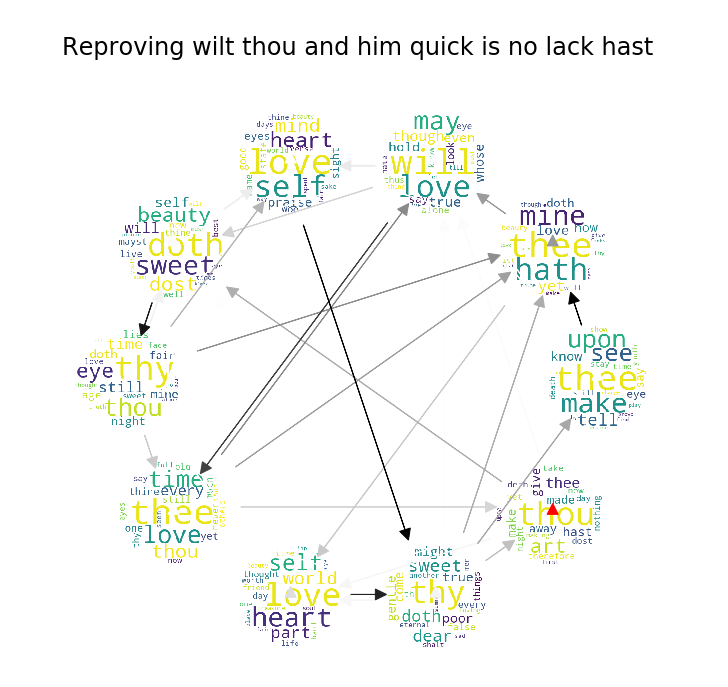

In [14]:
for hmm in hmms:
    anim = animate_emission(hmm, obs_map_s, M=10)
    HTML(anim.to_html5_video())

In [6]:
# version 1.0
num_hidden_states = [5, 8, 10, 15, 20, 25]
iterations = [50, 100, 150, 200]
hmms = []
num_obs_displayed = 10
#poems_output = []
for num_hs in num_hidden_states:
    print("***************************** Hidden States Start! *****************************")
    print("Current number of hidden states = ", num_hs)
    
    for iteration in iterations:
        print("----------------------- Iteration Start! -----------------------")
        print("Current iteration times = ", iteration)
        hmm8_s = unsupervised_HMM(obs_s, num_hs, iteration)
        print("HERE ___ Train done ___ HERE")
        hmms.append(hmm8_s)
        
        curr_poem_output = generate_rhyme_new(hmm8_s, rhyme_dict, syllable_dict, syllable_end_dict, obs_map_s)
        print("+++++++++ Current Poem Start! ++++++++")
        print(curr_poem_output)
        print("+++++++++ Current Poem End! ++++++++++")
        
        state_obs_topN = get_high_prob_obs(hmm8_s, num_obs_displayed)
        for key, value in state_obs_topN.items():
            print("///State = ", key, ", top N prob obs: ", value, "///")
            
        print("----------------------- Iteration End! ------------------------")
        
    print("***************************** Hidden States End! *****************************")
        

# generated_sentence = sample_sentence(hmm8_s, obs_map_s, n_words=300)

***************************** Hidden States Start! *****************************
Current number of hidden states =  5
----------------------- Iteration Start! -----------------------
Current iteration times =  50
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
HERE ___ Train done ___ HERE
count in generate_rhyme_new =  1
count in generate_rhyme_new =  2
count in generate_rhyme_new =  3
count in generate_rhyme_new =  4
count in generate_rhyme_new =  5
count in generate_rhyme_new =  6
count in generate_rhyme_new =  7
+++++++++ Current Poem Start! ++++++++
thee brag of thought how by on thee my thee,art that and i her sweet his seem strength day,my thing fame my name which though and to thee,i dispraise works you dedicated day,since your shall thou honour my the your time,and unlooked whom their are which reason so,at lovely me a gone shows her mourn time,this think pomp still despite add action so,o do ten first of when fresh makeless parts,in thy alive of which the

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
HERE ___ Train done ___ HERE
count in generate_rhyme_new =  1
count in generate_rhyme_new =  2
count in generate_rhyme_new =  3
count in generate_rhyme_new =  4
count in generate_rhyme_new =  5
count in generate_rhyme_new =  6
count in generate_rhyme_new =  7
+++++++++ Current Poem Start! ++++++++
far i all me for peace is given lest me,answer do his if rigour will of you,treasure will know honour doubt since at me,i not buriest forth minds thy lifts in you,iniquity which thy men but i do,sweet is that heart shall it alike my love,his both thou is sweet i from not shall do,have foul then so will do blind to that love,honour style art if are art my this me,tables be will by this sweet hung now this,within thou barren lifts give the stirred me,nothing still gaze my is to-morrow born this,from with i and then in hanging more then,can and in it to the

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
HERE ___ Train done ___ HERE
count in generate_rhyme_new =  1
count in generate_rhyme_new =  2
count in generate_rhyme_new =  3
count in generate_rhyme_new =  4
count in generate_rhyme_new =  5
count in generate_rhyme_new =  6
count in generate_rhyme_new =  7
+++++++++ Current Poem Start! ++++++++
hopes have never the that i and the black,in sweet what's words advised my of true love,they have that giving beauteous then ere black,will know disdains the my than the make love,had yet it love in when speak vainly me,which such publish thee that shadow to hours,fortify words them in i live for me,and saying bitterness weakness for flowers,let quick roses do sea true verse with cheek,that when by thy ah world and sweetness thee,him the home mind thus which supposed will seek,of more compare leese of me and art thee,my friend mind with faith anew with t

///State =  0 , top N prob obs:  ['my', 'thy', 'his', 'your', 'in', 'mine', 'me', 'their', 'or', 'this'] ///
///State =  1 , top N prob obs:  ['eye', 'own', 'heart', 'verse', 'life', 'friend', 'praise', 'mind', 'deeds', 'sight'] ///
///State =  2 , top N prob obs:  ['the', 'i', 'that', 'a', 'but', 'it', 'they', 'be', 'which', 'this'] ///
///State =  3 , top N prob obs:  ['days', 'spent', 'sight', 'dead', 'night', 'pen', 'gone', 'appear', 'prime', 'tomb'] ///
///State =  4 , top N prob obs:  ['and', 'of', 'to', 'that', 'is', 'a', 'as', 'by', 'so', 'if'] ///
///State =  5 , top N prob obs:  ['with', 'have', 'are', 'in', 'when', 'and', 'do', 'not', 'nor', 'so'] ///
///State =  6 , top N prob obs:  ['thou', 'me', 'your', 'thine', 'she', 'why', 'their', 'no', 'look', 'see'] ///
///State =  7 , top N prob obs:  ['you', 'i', 'thee', 'not', 'to', 'now', 'me', 'it', 'in', 'these'] ///
///State =  8 , top N prob obs:  ['love', 'time', 'truth', 'like', 'o', 'beauty', 'there', 'one', 'world', 'eve

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
HERE ___ Train done ___ HERE
count in generate_rhyme_new =  1
count in generate_rhyme_new =  2
count in generate_rhyme_new =  3
count in generate_rhyme_new =  4
count in generate_rhyme_new =  5
count in generate_rhyme_new =  6
count in generate_rhyme_new =  7
+++++++++ Current Poem Start! ++++++++
that years writ and love nor but give your love,thine hue ever bad deaths uneared desire,o thou love would the heart of poet's love,can why thou ever look on dust desire,to found by as it his painting and have,perspective my self and o let in name,that not for can what i like not that have,enough not that from his part thy my name,so a virtue by the commit one more,knowledge not burn not doth ill me his are,remembrance with of sensual pen and more,and and thou when what how by there they are,deep thence whilst winter's to it his alone,when no love colour vaunt as their alone.
+++++++++ Current Poem End! ++++++++++
///State 

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 110
Iteration: 120
Iteration: 130
Iteration: 140
Iteration: 150
Iteration: 160
Iteration: 170
Iteration: 180
Iteration: 190
Iteration: 200
HERE ___ Train done ___ HERE
count in generate_rhyme_new =  1
count in generate_rhyme_new =  2
count in generate_rhyme_new =  3
count in generate_rhyme_new =  4
count in generate_rhyme_new =  5
count in generate_rhyme_new =  6
count in generate_rhyme_new =  7
+++++++++ Current Poem Start! ++++++++
bark i me as civil can those youth more,the weed with for truth unworthiness thee,can though so so cries for now as love more,be yet my judgement where an steel with thee,have do in the wires hath buds upon true,how break to when when a up-locked chase,is which tyrants happy and only true,with says world of touch thou my from being face,this but state that bears strengthened making care,after and taught whe

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 110
Iteration: 120
Iteration: 130
Iteration: 140
Iteration: 150
HERE ___ Train done ___ HERE
count in generate_rhyme_new =  1
count in generate_rhyme_new =  2
count in generate_rhyme_new =  3
count in generate_rhyme_new =  4
count in generate_rhyme_new =  5
count in generate_rhyme_new =  6
count in generate_rhyme_new =  7
+++++++++ Current Poem Start! ++++++++
the or rebel acquainted i birds so,we but his five would since found that i no,truly thee as so poorly worst the so,to give that these on deaths as better so,own thy earth or time for some happier day,thy whether whose said you beauty of how,art hymn bare watchman blunting my love stay,better it conspire and doting eyes how,blamed that do but parts but fear and come thee,december's there or should so that do is,from the cure that they by may watchman thee,flattery they have it lov

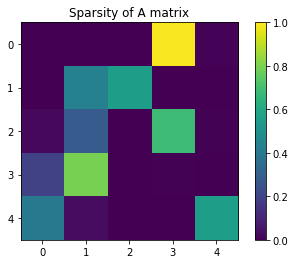

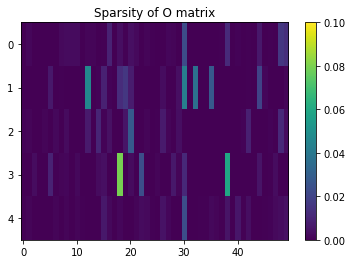

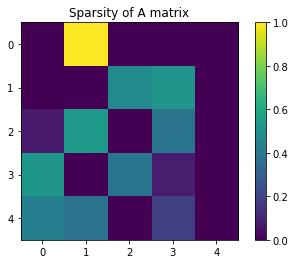

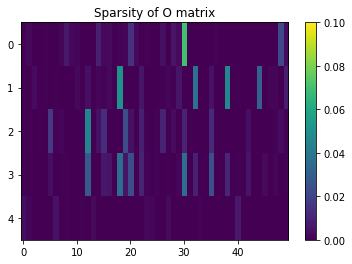

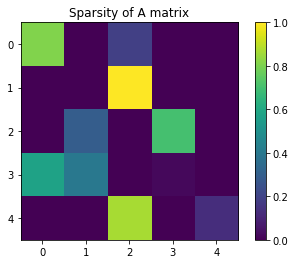

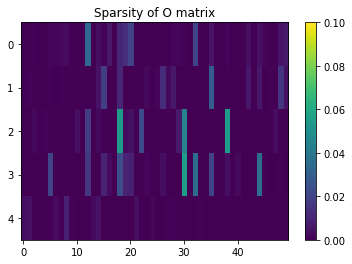

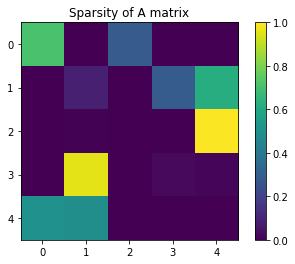

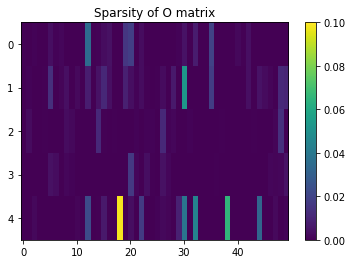

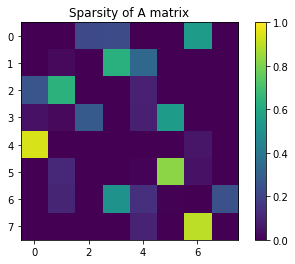

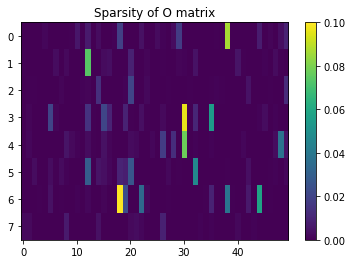

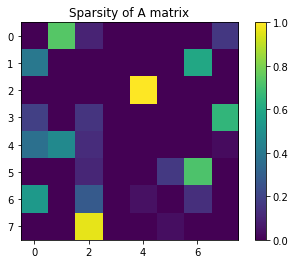

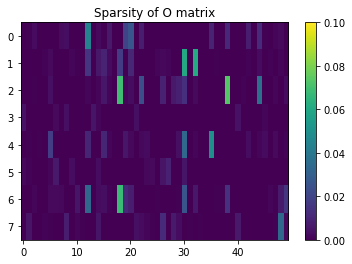

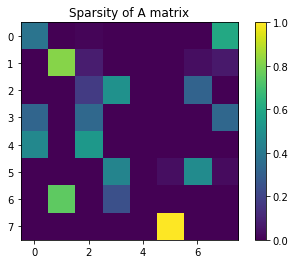

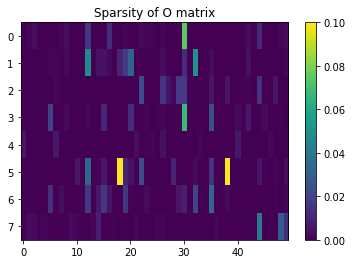

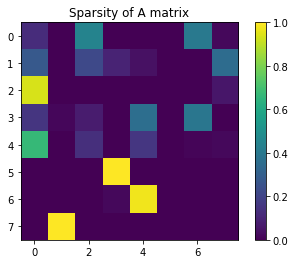

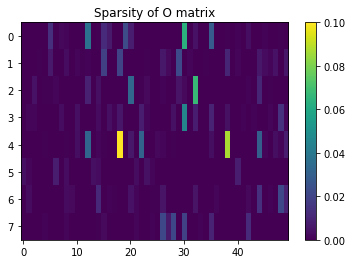

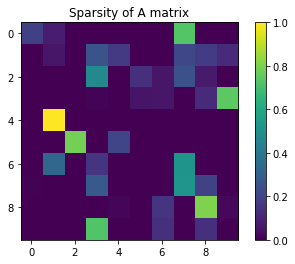

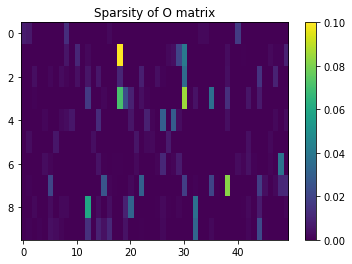

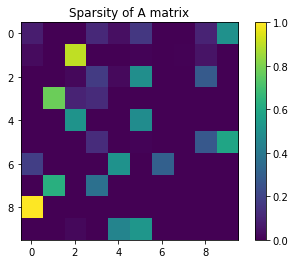

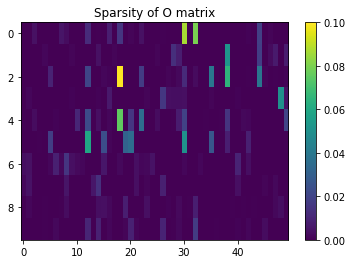

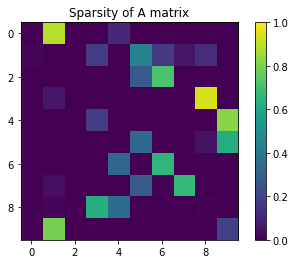

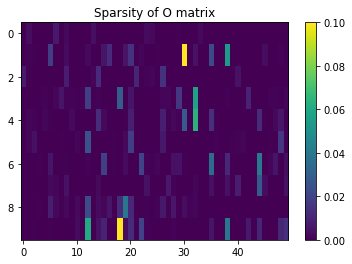

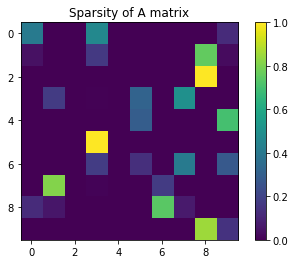

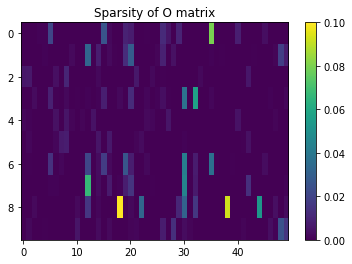

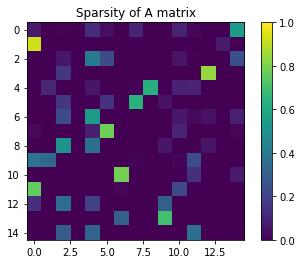

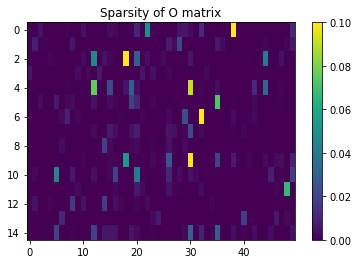

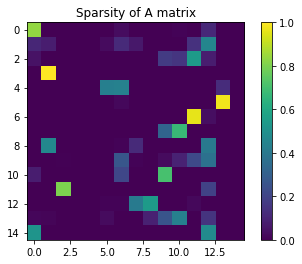

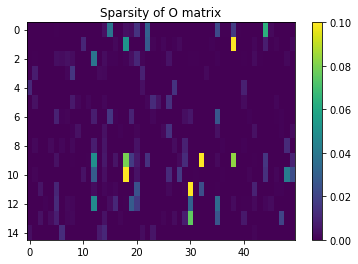

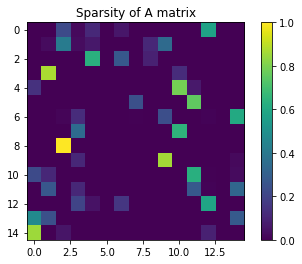

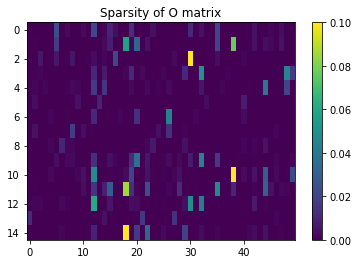

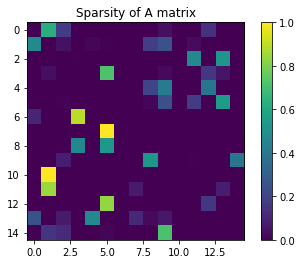

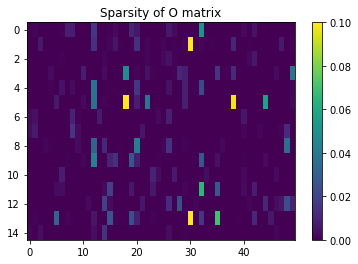

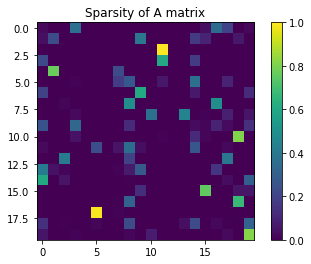

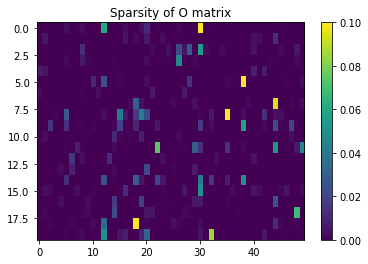

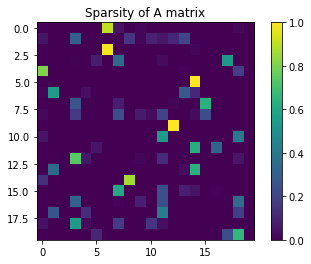

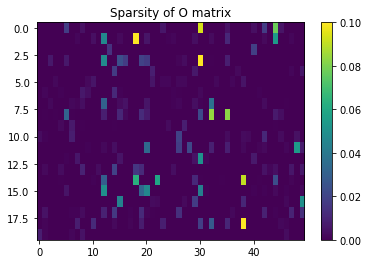

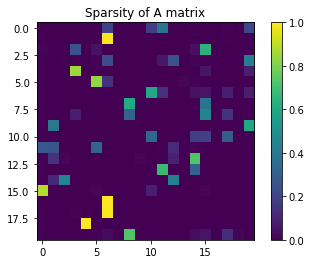

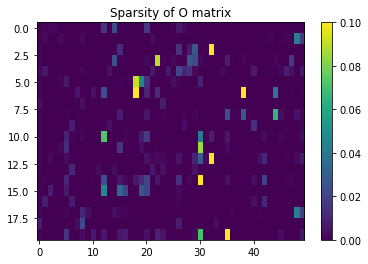

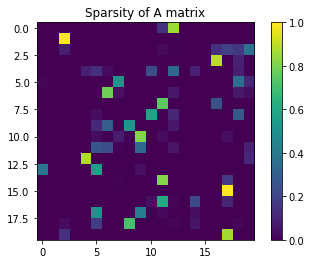

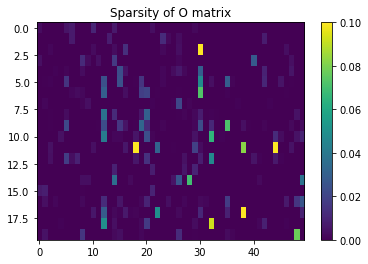

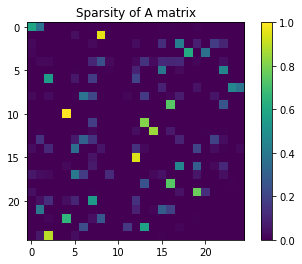

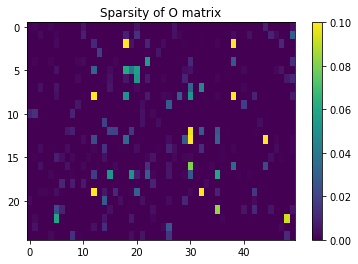

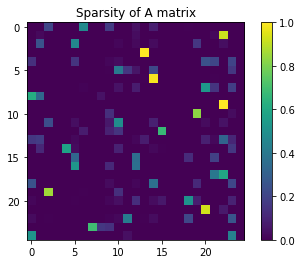

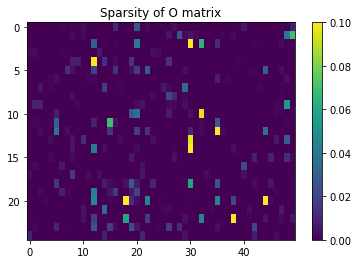

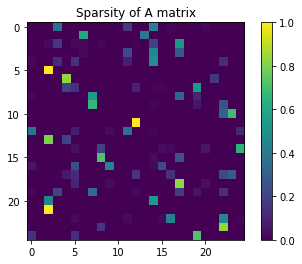

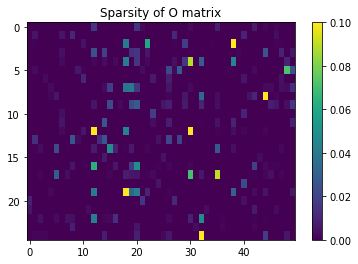

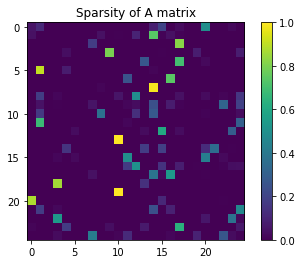

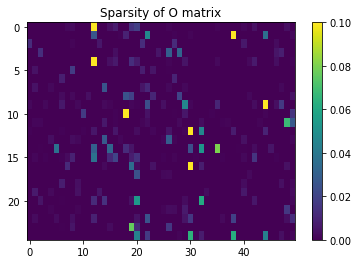

In [7]:
for hmm in hmms:
    visualize_sparsities(hmm, O_max_cols=50)